# Tarea 1: Clasificación de Tweets de Crisis con Modelos Multimodales

**Integrantes**
- Paola Rioseco
- Manuel Bórquez
  
cc66v1-generative-ai | `multimodal modeling task using a tweet classification dataset`


## Enunciado

En esta tarea utilizaremos el *Multimodal Crisis Dataset* (https://crisisnlp.qcri.org/crisismmd), esta vez empleando **modelos multimodales**. Este tipo de modelos permite integrar información proveniente tanto del **texto** como de las **imágenes asociadas**, por lo que son especialmente útiles en tareas que requieren información de distintas fuentes.

---



Con el fin de **mejorar la coherencia** de las predicciones, el dataset multimodal considera el **agrupamiento de algunas clases similares** en una misma categoría. Cada ejemplo del conjunto de datos incluye un **tweet** y su **imagen correspondiente**, junto con una **etiqueta** que pertenece al conjunto:

- `Affected individuals`  
- `Infrastructure and utility damage`  
- `Not humanitarian`  
- `Other relevant information`
- `Rescue volunteering or donation effort`

## Objetivos

**Vamos a ver cómo:**

- Fusionar datos de **imágenes** y **texto** para una tarea de **clasificación**.  
- Utilizar las representaciones de las **modalidades de imagen**, manteniendo los **pesos de los encoders congelados**.  
- *Fine-tunear* toda la red multimodal.  
- Probar distintos **métodos de fusión** mediante **capas de atención**.  
- Emplear un **modelo grande, preentrenado y multimodal**, como **VL-BERT** o **ViLT**.  
- Usar un **modelo LMM** (*Large Multimodal Model*) del tipo **BLIP-3**, preentrenado con **instrucciones**, en un escenario **zero-shot**.

## Instrucciones

### Coding

#### Se puede utilizar LLM para ayudarse!
Mirar a [un ejemplo](https://chatgpt.com/share/d534833e-bd2c-40c1-81eb-34818b195cac) de como pedir las respuestas a un LLM. Mejor si entenden lo que hagan.


### GPU y Google Colab

#### ¡Antes de comenzar! Algunos consejos sobre GPU y Google Colab

Es muy probable que ejecutes este código en **Google Colab** para poder usar recursos de **GPU**.  
Si no lo haces, ¡el código puede tardar hasta **60 veces más** en ejecutarse!  

#### Evitar desconexiones

Colab puede desconectarte si el entrenamiento dura demasiado.  
Para evitarlo, puedes usar el siguiente fragmento de código en la **consola de tu navegador**:

```java
function ClickConnect(){
  console.log("Working");
  document.querySelector("colab-toolbar-button#connect").click()
}
setInterval(ClickConnect,60000)
```

Vea mas [here](https://www.reddit.com/r/StableDiffusion/comments/xhhlp0/automatic1111_on_colab_how_to_keep_it_running/).

#### Otra cuenta
Si te quedas sin recursos disponibles, puedes **cambiar la cuenta** que estás usando en Colab.  
Crea otra cuenta de **Gmail** y cámbiate a ella; esto debería proporcionarte **más recursos de GPU**.

¡Buena suerte!

### Entrenamientos

#### Para cada entrenamiento
* Informa de las curvas de pérdida y precisión en el entrenamiento y la validación.
* Detén el entrenamiento en función de los resultados obtenidos en el conjunto de validación.
* Utiliza una tasa de aprendizaje pequeña para que puedas ver cómo disminuye la pérdida en las distintas curvas.
* Recuerde que la tarea es de clasificación multiclase, por lo que debe usar **F1-Score** para la evaluación de sus modelos.

### Modelos

#### Transformer para modalidad texto:

Utilice un modelo **preentrenado** de la librería **HuggingFace** y **ajústalo (fine-tuning)** sobre el conjunto de datos.

* Para los datos, puedes usar las clases `Dataset` y `DataLoader` de `torch.utils.data`.  
* Para la modelización:
  * Puedes utilizar las clases `AutoTokenizer` y `AutoModel` de la librería `transformers`.  
  * Carga los **pesos del modelo preentrenado**, junto con el **tokenizador asociado**.  
  * Puedes usar un modelo **RoBERTa clásico**, como [`roberta-base`](https://huggingface.co/roberta-base).  
  * También puedes usar otro modelo de HuggingFace, por ejemplo uno más **ligero** como [`distilbert-base-uncased`](https://huggingface.co/distilbert-base-uncased).  
    ⚠️ Si haces esto, asegúrate de **cambiar el token de separación de los tweets**, que en este caso es `<CLS>`.  

#### Modelo Multimodal

* Para el **fine-tuning** (optimización):
  * Implementa el bucle de entrenamiento en **PyTorch** — **no uses** la clase `Trainer` de la librería `transformers`.  
  * Puedes utilizar funciones de pérdida clásicas como **cross-entropy**, y el optimizador que prefieras (`Adam` o `AdamW`, por ejemplo).  
  * Configura una tasa de aprendizaje de `1e-5`, un **batch size** de `32` y entrena durante **10 épocas**.  
  * Asegúrate de que el modelo **converge correctamente**, observando las curvas de pérdida de entrenamiento y validación.  

Estos valores deberian funcionar bien:
```python
optimizer_params = {
    'lr': 1e-5,
    'batch_size': 32,
    'num_epochs':10,
}
```

### Indicaciones generales

#### Indicaciones generales para el desarrollo de modelos:

**Métricas**: Para esta tarea de clasificación, use la **puntuación F1** (*F1-score*) para evaluar el rendimiento de los modelos.  

**Fusión Multimodal**: El principio consiste en **codificar cada modalidad** (texto e imagen) y **fusionarlas** para realizar la predicción conjunta.  

**Codificación de Texto**: Es necesario convertir el texto en un vector. Se pueden implementar distintos enfoques:
* Una codificación simple de texto utilizando **Bag-of-Words** y **TF-IDF**, o una representación basada en **word2vec** con agregación mediante la **media aritmética**.  
* Una codificación usando **RoBERTa**, tomando el token `<s>` como representación del texto (`<s>` es el token de inicio de una secuencia tokenizada para RoBERTa).  

**Codificación de Imágenes**: Es necesario convertir las imágenes en vectores utilizando una **CNN preentrenada**, que genere una representación de la imagen:
* Un modelo **EfficientNetB2** o **EfficientNetB3** preentrenado sobre **ImageNet**.  
* Un modelo **EfficientNetB2** o **EfficientNetB3** ya **fine-tuneado** sobre el conjunto de datos de desastres en el **Multimodal Crisis Dataset**.  


## Configuraciones

### Dependencias

**conda environment**:

In [1]:
!cat environment.yml


name: mbb-cc66v-1-assignment-1
channels:
  - conda-forge
  - nodefaults
dependencies:
  - python=3.11
  - ipywidgets
  - jupyterlab>=4
  - jupyterlab_widgets
  - ipykernel
  - numpy=1.26.*
  - pandas>=2.0
  - matplotlib>=3.8
  - scikit-learn>=1.4
  - pillow>=10.0
  - tqdm>=4.66
  - gensim=4.3.3
  - pip
  - pip:
      - torch==2.3.0
      - torchvision==0.18.0
      - transformers>=4.47
      - accelerate>=0.33
      - safetensors>=0.4
      - sentencepiece>=0.2


**imports de librerías**:

In [2]:
import os
import tarfile, zipfile
from pathlib import Path
import urllib.request
import pandas as pd
import json
from json import JSONDecodeError

import csv
import torch
import re
from torch import nn
from torch.nn import MultiheadAttention, CrossEntropyLoss
from transformers import AutoModel, AutoTokenizer
from torchvision import models, transforms
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import f1_score, accuracy_score, classification_report
import numpy as np
import random
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from tqdm.auto import tqdm
import copy
import torch.optim as optim


### Constantes

**constantes generales**:

In [3]:
TEST_MODE = True
TEST_SIZE = 100


**rutas y carpetas**:

In [4]:
# path y directorios
DATA_DIR = "data"
DATA_PATH = Path(DATA_DIR)
DATA_PATH.mkdir(parents=True, exist_ok=True)

# raw data
RAW_DATA_PATH = Path(DATA_DIR, "raw")
RAW_DATA_PATH.mkdir(parents=True, exist_ok=True)

# imágenes assigments/assigment-1/data/raw/CrisisMMD_v2.0/data_image
IMG_DATA_PATH = Path(RAW_DATA_PATH, "CrisisMMD_v2.0", "data_image")
IMG_DATA_PATH.mkdir(parents=True, exist_ok=True)

# imágenes assigments/assigment-1/data/raw/CrisisMMD_v2.0
MMD_DATA_PATH = Path(RAW_DATA_PATH, "CrisisMMD_v2.0")
MMD_DATA_PATH.mkdir(parents=True, exist_ok=True)

# imágenes assigments/assigment-1/data/raw/CrisisMMD_v2.0/json
JSN_DATA_PATH = Path(RAW_DATA_PATH, "CrisisMMD_v2.0", "json")
JSN_DATA_PATH.mkdir(parents=True, exist_ok=True)


### Uso de gpu (mps)

In [5]:
if torch.backends.mps.is_available():
    print("[INFO ]MPS disponible:", torch.backends.mps.is_available())
    print(" - MPS built with PyTorch:", torch.backends.mps.is_built())
    device = torch.device("mps")
else:
    print(" - MPS no disponible en este entorno.")
    device = torch.device("cpu")


[INFO ]MPS disponible: True
 - MPS built with PyTorch: True


## Funciones

### Descarga y Tratamiento de Archivos Comprimidos

In [6]:
def descargar_crisismmd(dataset_url, path_archivo):

    if path_archivo.exists():
        print(f"[INFO] Archivo '{path_archivo}' ya existe. No se descarga.")
        return

    print(f"[INFO] Descargando dataset desde {dataset_url} ...")
    urllib.request.urlretrieve(dataset_url, path_archivo)
    print(f"[INFO] Descarga completa de archivo {path_archivo}.")

def descomprimir_archivo(path_archivo, path_destino, marker, forzar = True):
    marker = Path(path_destino, marker)

    # eliminar __MACOSX si existe
    if Path(RAW_DATA_PATH, "__MACOSX").exists():
        os.system(f"rm -rf {Path(RAW_DATA_PATH, '__MACOSX')}")

    if marker.exists():
        if not forzar:
            print(f"[INFO] Ya descomprimido en '{path_destino}'. No se descomprime de nuevo.")
            return

    if path_archivo.suffix == ".zip":
        print(f"[INFO] Descomprimiendo ZIP{path_archivo} ...")
        with zipfile.ZipFile(path_archivo, "r") as z:
            z.extractall(path_destino)
    else:  
        print(f"[INFO] Descomprimiendo TAR{path_archivo} ...")
        with tarfile.open(path_archivo, "r:*") as tar:
            tar.extractall(path_destino)
            
    print(f"[INFO] Descompresión completa en '{path_destino}'")


### Procesamiento de Archivos

In [7]:
def contar_registros_tsv(path, encoding="utf-8"):
    try:
        with path.open("r", encoding=encoding, newline="") as f:
            return sum(1 for _ in csv.reader(f, delimiter="\t"))
    except UnicodeDecodeError:
        with path.open("r", encoding="latin-1", errors="replace", newline="") as f:
            return sum(1 for _ in csv.reader(f, delimiter="\t"))

def contar_registros_json(path, encoding="utf-8"):
    # contar líneas físicas
    cont_lineas = 0
    with open(path, encoding="utf-8", errors="ignore") as f:
        cont_lineas = sum(1 for _ in f)
        if cont_lineas > 0:
            return cont_lineas
    try:
        with path.open("r", encoding=encoding) as f:
            data = json.load(f)
            return len(data) if isinstance(data, list) else 1
    except UnicodeDecodeError:
        with path.open("r", encoding="latin-1", errors="replace") as f:
            data = json.load(f)
            return len(data) if isinstance(data, list) else 1
    except json.JSONDecodeError:
        # Fallback: JSON Lines o varios objetos concatenados
        count = 0
        with path.open("r", encoding=encoding, errors="replace") as f:
            for line in f:
                line = line.strip()
                if not line:
                    continue
                try:
                    json.loads(line)
                    count += 1
                except json.JSONDecodeError:
                    return None  # no es JSON válido
        return count

def listar_archivos_metadata(data_dir, sufijo):
    base = Path(data_dir)
    out = []
    for p in base.rglob("*"):
        if p.name.startswith("._"):  # saltar resource forks
            continue
        if p.suffix.lower() == sufijo:
            registros = None
            if sufijo.lower() == ".tsv":
                registros = contar_registros_tsv(p)
            elif sufijo.lower() == ".json":
                registros = contar_registros_json(p)
            out.append({
                "nombre": p.name,
                "tipo": p.suffix.lower(),
                "carpeta": str(p.parent.relative_to(base)),
                "megabytes": round(p.stat().st_size / (1024 * 1024), 2),
                "registros": registros,
                "path": p,
            })
    return out

def leer_columnas_tsv(path, encoding="utf-8"):
    path = Path(path)
    try:
        with path.open("r", encoding=encoding, newline="") as f:
            reader = csv.reader(f, delimiter="\t")
            return next(reader, [])
    except UnicodeDecodeError:
        with path.open("r", encoding="latin-1", errors="replace", newline="") as f:
            reader = csv.reader(f, delimiter="\t")
            return next(reader, [])
    except Exception:
        return []

def leer_claves_json(path, encoding="utf-8"):
    path = Path(path)
    try:
        with path.open("r", encoding=encoding) as f:
            data = json.load(f)
    except UnicodeDecodeError:
        with path.open("r", encoding="latin-1", errors="replace") as f:
            data = json.load(f)
    except json.JSONDecodeError:
        # fallback JSONL: toma el primer objeto válido
        with path.open("r", encoding=encoding, errors="replace") as f:
            for line in f:
                line = line.strip()
                if not line:
                    continue
                try:
                    data = json.loads(line)
                    break
                except json.JSONDecodeError:
                    continue
    # si no hay data o no es dict/lista de dict, retorna []
    if isinstance(data, list) and data:
        if isinstance(data[0], dict):
            return list(data[0].keys())
        return []
    if isinstance(data, dict):
        return list(data.keys())
    return []

def remover_urls(text):
    return re.sub(r'http\S+|www\S+', '', text).strip()


### Exploración

In [8]:
def cargar_crisismmd_tsv(path):
    rows = []
    with open(path, encoding="utf-8") as f:
        header = f.readline().strip().split("\t")
        expected_cols = len(header)

        for line in f:
            parts = line.rstrip("\n").split("\t")

            if len(parts) == expected_cols:
                rows.append(parts)
            elif len(parts) > expected_cols:
                fixed = parts[:4] + [" ".join(parts[4:len(parts)-(expected_cols-5)])] + parts[-(expected_cols-5):]
                rows.append(fixed)
            else:
                print("skiping line")
                continue

    df = pd.DataFrame(rows, columns=header)
    return df


In [9]:
def imprimir_arbol_carpeta(raiz, max_archivos=5, prefijo=""):
    raiz = Path(raiz)
    if not raiz.exists():
        print(f"[WARN] No existe {raiz}")
        return

    def filtered(entries):
        for e in entries:
            if e.name.startswith(".") or e.name == ".DS_Store":
                continue
            yield e

    def render(entries, prefijo):
        total = len(entries)
        for idx, entry in enumerate(entries):
            connector = "└── " if idx == total - 1 else "├── "
            print(f"{prefijo}{connector}{entry.name}")
            if entry.is_dir():
                child_prefijo = prefijo + ("    " if idx == total - 1 else "│   ")
                child_entries = sorted(filtered(entry.iterdir()), key=lambda p: (p.is_file(), p.name))
                limited = child_entries[:max_archivos]
                render(limited, child_prefijo)
                if len(child_entries) > max_archivos:
                    print(f"{child_prefijo}└── … ({len(child_entries)-max_archivos} más)")

    entries = sorted(filtered(raiz.iterdir()), key=lambda p: (p.is_file(), p.name))
    render(entries[:max_archivos], prefijo)
    if len(entries) > max_archivos:
        print(f"{prefijo}└── … ({len(entries)-max_archivos} más)")


### Anotaciones

In [10]:
def cargar_anotaciones(task="humanitarian",data_dir=RAW_DATA_PATH):
    datasplits = {}
    for split in ["train","dev","test"]:
        df = cargar_crisismmd_tsv(os.path.join(data_dir,f"crisismmd_datasplit_agreed_label/task_{task}_text_img_agreed_lab_{split}.tsv"))
        df = df.rename(columns={"image":"image_path"})
        if split == "dev":
            datasplits["val"] = df
        else:
            datasplits[split] = df

    return datasplits

def leer_data(anotaciones,split, subsampling=None):
    path_image = anotaciones[split]["image_path"]
    df = anotaciones[split][['tweet_text', 'label_text']]

    if subsampling is not None:
        df = df.sample(n=subsampling).reset_index()

    X = df.tweet_text
    y = df.label_text

    return X, y, path_image

def describir_anotaciones(data_dir=RAW_DATA_PATH):
    print("[INFO] descripción de anotaciones")
    data_dir = Path(data_dir)

    archivos = list(data_dir.glob(
        "crisismmd_datasplit_agreed_label/task_*_text_img_agreed_lab_*.tsv"
    ))
    print(f" - # archivos con anotaciones: {len(archivos)}")

    tasks = sorted({
        p.stem.split("task_")[1].rsplit("_text_img_agreed_lab_", 1)[0]
        for p in archivos
    })
    if not tasks:
        print(f"[WARN] no se encontraron TSVs de CrisisMMD en el directorio {data_dir}")
        return pd.DataFrame(), archivos, tasks, []

    print(f" - # tareas: {len(tasks)}")

    resumen_rows = []
    splits_encontrados = set()
    total_anotaciones = 0

    for task in tasks:
        anotaciones = cargar_anotaciones(task=task, data_dir=data_dir)
        for split, df in anotaciones.items():
            splits_encontrados.add(split)
            total_anotaciones += len(df)
            print(f"\n=== task[{task}], split[{split}] === filas: {len(df):,} | columnas: {len(df.columns)}")
            print("Columnas:", ", ".join(df.columns))

            row = {
                "task": task,
                "split": split,
                "filas": len(df),
                "columnas": len(df.columns),
                "image_path_vacias": df["image_path"].isna().sum() if "image_path" in df.columns else None,
            }

            for col in ["label", "label_text", "label_image", "label_text_image", "labels", "category", "class"]:
                if col in df.columns:
                    vc = df[col].value_counts(dropna=False)
                    row[f"{col}_n_clases"] = vc.size
                    row[f"{col}_top"] = vc.head(3).to_dict()
                    print(f"\nDistribución de '{col}':")
                    print(vc)
                else:
                    row[f"{col}_n_clases"] = None
                    row[f"{col}_top"] = None

            for col in ["event_id", "event", "location", "country"]:
                if col in df.columns:
                    print(f"\nTop valores de '{col}':")
                    print(df[col].value_counts().head(10))
                    row[f"{col}_top"] = df[col].value_counts().head(5).to_dict()
                    break

            for col in ["text", "tweet_text", "message", "content"]:
                if col in df.columns:
                    lengths = df[col].astype(str).str.len()
                    stats = lengths.describe()[["mean", "std", "min", "max"]]
                    print("\nLongitud de texto (caracteres):")
                    print(stats)
                    row["texto_col"] = col
                    row["texto_mean"] = stats["mean"]
                    row["texto_std"] = stats["std"]
                    row["texto_min"] = stats["min"]
                    row["texto_max"] = stats["max"]
                    break

            resumen_rows.append(row)

    print(f"\n[INFO] total de anotaciones en todos los archivos: {total_anotaciones:,}")

    df_resumen = pd.DataFrame(resumen_rows)
    splits_lista = sorted(splits_encontrados)
    return df_resumen, archivos, tasks, splits_lista, total_anotaciones

def totales_por_anotaciones_y_imgs(raw_resumen, total_anot, tareas, data_dir=RAW_DATA_PATH):
    # resumen de anotaciones por task
    anot_por_task = (
        raw_resumen
        .groupby("task")["filas"]
        .sum()
        .sort_values(ascending=False)
    )

    print("[INFO] anotaciones por tarea:")
    for task, n in anot_por_task.items():
        print(f" - {task}: {n:,}")
    print()
    print(f"[INFO] total anotaciones: {total_anot:,}")

    # image_id que aparecen en más de un registro, por tarea
    dup_imgs_por_task = {}
    for task in tareas:
        anotaciones = cargar_anotaciones(task=task, data_dir=data_dir)
        ids = []
        for df in anotaciones.values():
            if "image_id" in df.columns:
                ids.append(df["image_id"].dropna().astype(str))
        if ids:
            all_ids = pd.concat(ids, ignore_index=True)
            dup_imgs_por_task[task] = (all_ids.value_counts() > 1).sum()
        else:
            dup_imgs_por_task[task] = 0

    print("\n[INFO] image_id repetidos por tarea (>1 vez):")
    for task, n in dup_imgs_por_task.items():
        print(f" - {task}: {n:,}")

    return anot_por_task, dup_imgs_por_task


**estadísticas para anotaciones**:

In [11]:
def resultado_general_anotaciones(raw_data_path, tareas, cargar_anotaciones_fn):
    raw_data_path = Path(raw_data_path)
    filas_resumen = []

    print("[INFO] Calculando resumen general de imágenes por tweet (agregado por task)...")
    for task in tareas:
        print(f"\n[INFO] Procesando task = {task}")
        anotaciones = cargar_anotaciones_fn(task=task, data_dir=raw_data_path)

        # concatenar todos los splits de la tarea
        df_task = pd.concat(anotaciones.values(), ignore_index=True)

        if "tweet_id" not in df_task.columns:
            print(f"[WARN] La task '{task}' no tiene columna 'tweet_id'. Se omite del resumen.")
            continue

        # priorizar image_id; si no existe, usar la columna image
        if "image_id" in df_task.columns:
            imgs_por_tweet = (
                df_task
                .dropna(subset=["tweet_id", "image_id"])
                .groupby("tweet_id")["image_id"]
                .nunique()
            )
        elif "image" in df_task.columns:
            imgs_por_tweet = (
                df_task
                .dropna(subset=["tweet_id", "image"])
                .groupby("tweet_id")["image"]
                .nunique()
            )
        else:
            print(f"[WARN] La task '{task}' no tiene columnas 'image_id' ni 'image'.")
            imgs_por_tweet = pd.Series(dtype=int)

        n_tweets = int(imgs_por_tweet.shape[0])
        n_multi = int((imgs_por_tweet > 1).sum())
        max_imgs = int(imgs_por_tweet.max()) if not imgs_por_tweet.empty else 0
        pct_multi = round(n_multi / n_tweets * 100, 2) if n_tweets > 0 else 0.0

        print(f" - tweets_totales            : {n_tweets:,}")
        print(f" - tweets_con_varias_imagenes: {n_multi:,} ({pct_multi:.2f}%)")
        print(f" - max_imagenes_por_tweet    : {max_imgs}")

        filas_resumen.append({
            "task": task,
            "tweets_totales": n_tweets,
            "tweets_con_varias_imagenes": n_multi,
            "pct_tweets_multi_imagen": pct_multi,
            "max_imagenes_por_tweet": max_imgs,
        })

    df_resultado = pd.DataFrame(filas_resumen)
    print("\n[INFO] Resumen general completado.")
    return df_resultado

def detalle_por_archivo_anotaciones(archivos, cargar_tsv_fn):
 
    filas_detalle = []
    print("[INFO] Construyendo detalle por archivo TSV...")

    for path in archivos:
        path = Path(path)
        print(f"\n[INFO] Leyendo archivo: {path}")
        df = cargar_tsv_fn(path)

        # extraer task y split desde el nombre del archivo
        stem = path.stem  # ej: task_humanitarian_text_img_agreed_lab_train
        task = None
        split = None
        if "task_" in stem and "_text_img_agreed_lab_" in stem:
            task = stem.split("task_")[1].rsplit("_text_img_agreed_lab_", 1)[0]
            split = stem.rsplit("_", 1)[-1]

        if "tweet_id" in df.columns:
            if "image_id" in df.columns:
                imgs_por_tweet = (
                    df
                    .dropna(subset=["tweet_id", "image_id"])
                    .groupby("tweet_id")["image_id"]
                    .nunique()
                )
            elif "image" in df.columns:
                imgs_por_tweet = (
                    df
                    .dropna(subset=["tweet_id", "image"])
                    .groupby("tweet_id")["image"]
                    .nunique()
                )
            else:
                print("  [WARN] El archivo no tiene columnas 'image_id' ni 'image'.")
                imgs_por_tweet = pd.Series(dtype=int)
        else:
            print("  [WARN] El archivo no tiene columna 'tweet_id'.")
            imgs_por_tweet = pd.Series(dtype=int)

        n_tweets = int(imgs_por_tweet.shape[0])
        n_multi = int((imgs_por_tweet > 1).sum())
        max_imgs = int(imgs_por_tweet.max()) if not imgs_por_tweet.empty else 0
        pct_multi = round(n_multi / n_tweets * 100, 2) if n_tweets > 0 else 0.0

        print(f"  - filas                     : {len(df):,}")
        print(f"  - tweets_totales            : {n_tweets:,}")
        print(f"  - tweets_con_varias_imagenes: {n_multi:,} ({pct_multi:.2f}%)")
        print(f"  - max_imagenes_por_tweet    : {max_imgs}")

        filas_detalle.append({
            "archivo": path.name,
            "task": task,
            "split": split,
            "filas": len(df),
            "tweets_totales": n_tweets,
            "tweets_con_varias_imagenes": n_multi,
            "pct_tweets_multi_imagen": pct_multi,
            "max_imagenes_por_tweet": max_imgs,
        })

    df_detalle = pd.DataFrame(filas_detalle)
    print("\n[INFO] Detalle por archivo completado.")
    return df_detalle

def mostrar_por_split_anotaciones(df_detalle, raw_splits=None):

    print("[INFO] Construyendo resumen por split (a partir de df_detalle)...")

    if df_detalle is None or df_detalle.empty:
        print("[WARN] df_detalle está vacío. No se puede generar resumen por split.")
        return pd.DataFrame()

    agrupado = (
        df_detalle
        .groupby("split", as_index=False)
        .agg(
            n_archivos=("archivo", "nunique"),
            n_tasks=("task", "nunique"),
            filas=("filas", "sum"),
            tweets_totales=("tweets_totales", "sum"),
            tweets_con_varias_imagenes=("tweets_con_varias_imagenes", "sum"),
        )
    )
    agrupado["pct_tweets_multi_imagen"] = (
        agrupado["tweets_con_varias_imagenes"] / agrupado["tweets_totales"] * 100
    ).round(2)

    # ordenar splits si se pasa raw_splits
    if raw_splits is not None:
        categorias = [s for s in raw_splits if s in agrupado["split"].unique()]
        if categorias:
            agrupado["split"] = pd.Categorical(
                agrupado["split"],
                categories=categorias,
                ordered=True,
            )
            agrupado = agrupado.sort_values("split").reset_index(drop=True)

    print("[INFO] Resumen por split listo:")
    print(agrupado)

    return agrupado


### Tratamiento de Imágenes

In [12]:
def recorrer_archivos_imagenes(dir_raiz=IMG_DATA_PATH):
    root = Path(dir_raiz)
    filas = []
    omitidos = 0

    for p in root.rglob("*"):
        if p.is_file():
            if p.name == ".DS_Store":
                omitidos +=1
            else:
                rel = p.relative_to(root)
                parts = rel.parts
                filas.append({
                    "clave": p.name,
                    "extension": p.suffix.lower(),
                    "evento_key": parts[0] if len(parts) > 1 else "",
                    "ruta_rel": str(rel),
                    "ruta_abs": str(p.resolve()),
                    "tam_bytes": p.stat().st_size,
                })
    print (f"[INFO] explorar imágenes:")
    print (f" - registros omitidos: {omitidos}")
    print (f" - registros cargados: {len(filas)}")
    return pd.DataFrame(filas)


### Tratamiento de JSON

In [13]:
def cargar_json_completo(ruta_json):
    print()
    print(f"[INFO] cargar json completo {ruta_json}:")
    errores = 0

    p = Path(ruta_json)
    if p.suffix.lower() != ".json" or p.name.startswith(("._", ".DS_Store")):
        print(f"[WARN] archivo no es json. Info: {p.suffix.lower()}, {p.name}")
        return
    
    # contar líneas físicas
    with open(p, encoding="utf-8", errors="ignore") as f:
        cont_lineas = sum(1 for _ in f)
        print(f" - # líneas físicas {cont_lineas}:")

    filas = []
    # esquema abrir con  JSONL (cada línea un objeto)
    with open(p, encoding="utf-8", errors="ignore") as f:
        for i, line in enumerate(f, start=1):
            line = line.strip()
            if not line:
                continue
            try:
                filas.append(json.loads(line))
            except Exception as e:
                errores += 1
                print(f"[WARN] línea {i} inválida en {p.name}: {e}")
                continue 

    # si no era JSONL, usar abrir_json (lista o dict)
    if not filas:
        data = abrir_json(p)
        if isinstance(data, dict):
            filas = [data]
        elif isinstance(data, list):
            filas = data
        else:
            filas = []

    # onstruir DataFrame
    df = pd.DataFrame(filas) if filas else pd.DataFrame()
    print(f" - # líneas en dataframe de salida {len(df)}:")
    print(f" - # filas con error: {errores}")

    return filas, df, cont_lineas


def abrir_json(ruta_json):
    p = Path(ruta_json)
    cont_lineas = 0
    if p.suffix.lower() != ".json" or p.name.startswith(("._", ".DS_Store")):
        print(f"[WARN] archivo no es json {p.name}")
        return

    try:
        with open(p) as f:
            data_json = json.load(f)
    except JSONDecodeError:
        try:
            with open(p) as f:
                data_json = json.loads(f.readline())
        except Exception as e:
            print(f"[ERROR] error al procesar {ruta_json}, error: {e}")
            return

    return data_json


def mostrar_columnas_json_presentes(df_json, col_ruta="path"):
    registros = []
    orden_claves = []
    fallidos = []
    print(f"[INFO] mostrar columnas presentes o ausentes por json:")
    for ruta in df_json[col_ruta]:
        p = Path(ruta)
        try:
            data = abrir_json(p)
        except Exception:
            fallidos.append(p.name)
            continue
        if isinstance(data, list) and data:
            keys = list(data[0].keys())
        elif isinstance(data, dict):
            keys = list(data.keys())
        else:
            keys = []

        for k in keys:
            if k not in orden_claves:
                orden_claves.append(k)

        registros.append((p.name, set(keys)))

    filas = []
    for nombre, keys in registros:
        fila = {"archivo": nombre}
        fila.update({k: int(k in keys) for k in orden_claves})
        filas.append(fila)

    df_out = pd.DataFrame(filas)
    if fallidos:
        print(f"[WARN] Archivos no procesados: {fallidos}")
    return df_out

def cargar_jsons_unificados(df_archivos_json, col_ruta="path"):
    print("[INFO] cargar dataframe con todos los json:")
    procesados, fallidos, dfs, all_cols = [], [], [], set()
    tmp = []
    cont_lineas_total = 0

    # Pase 1: leer archivos y recolectar claves
    for ruta in df_archivos_json[col_ruta]:
        p = Path(ruta)
        if p.suffix.lower() != ".json" or p.name.startswith(("._", ".DS_Store")):
            continue
        try:
            filas, df_local, line_count = cargar_json_completo(p)
            cont_lineas_total += line_count
            if not filas:
                fallidos.append((p.name, "sin filas válidas"))
                continue

            # Homogeneizar
            filas_norm = []
            for item in filas:
                if isinstance(item, dict):
                    filas_norm.append(item)
                elif isinstance(item, list):
                    filas_norm.append({f"col_{j}": v for j, v in enumerate(item)})
                else:
                    filas_norm.append({"value": item})

            evento = p.stem.replace("_final_data", "")
            tmp.append((evento, p.name, filas_norm))
            for d in filas_norm:
                all_cols.update(d.keys())

            procesados.append(p.name)
        except Exception as e_file:
            fallidos.append((p.name, f"error: {e_file}"))
            print(f"[ERROR] error al procesar {p.name}: {e_file}")
            continue

    # Pase 2: construir DataFrames reindexando a todas las columnas
    for evento, nombre_archivo, filas_norm in tmp:
        df = pd.DataFrame.from_records(filas_norm)
        df = df.reindex(columns=sorted(all_cols))  # faltantes -> None/NaN
        df.insert(0, "evento_key", evento)
        dfs.append(df)

    if not dfs:
        raise ValueError("No se cargaron JSONs válidos.")
    df_unificado = pd.concat(dfs, ignore_index=True).convert_dtypes()

    print()
    print("[INFO] estadísticas del proceso:")
    print(f" - archivos procesados: {procesados}")
    print(f" - archivos no procesados: {fallidos}")
    print(f" - suma de líneas físicas de todos los archivos: {cont_lineas_total}")
    print(f" - total json: {len(df_unificado)}")
    return df_unificado


### Funciontes Utilitarias

In [14]:
def mostrar_colormaps_ejemplo(n=5):
    # lista de colormaps disponibles
    cmaps = plt.colormaps()
    elegidos = random.sample(cmaps, k=min(n, len(cmaps)))

    data = np.linspace(0, 1, 256)
    fig, axes = plt.subplots(len(elegidos), 1, figsize=(6, 0.8*len(elegidos)))

    if len(elegidos) == 1:
        axes = [axes]

    for ax, cmap_name in zip(axes, elegidos):
        ax.imshow([data], aspect="auto", cmap=cmap_name)
        ax.set_axis_off()
        ax.set_title(cmap_name, loc="left")

    plt.tight_layout()
    plt.show()


### Funciontes para Graficar

In [15]:
def graficar_distribucion_etiquetas_por_split(anotaciones, task_name="", mapa_colores="summer_r"):
    df = pd.concat({s: d.assign(split=s) for s, d in anotaciones.items()}, ignore_index=True)
    dist = (
        df.groupby(["label", "split"])
          .size()
          .unstack(fill_value=0)
    )
    orden_splits = [c for c in dist.columns]
    if orden_splits:
        dist = dist[orden_splits]
    alto = len(dist) * 1.5
    ancho = max(alto * 1.5, 12)
    ax = dist.plot(kind="barh", stacked=True, figsize=(ancho, alto), colormap=mapa_colores)
    titulo = f"Distribución de etiquetas por split{f' ({task_name})' if task_name else ''}"
    ax.set_title(titulo)
    ax.set_xlabel("# Registros")
    ax.set_ylabel("Etiqueta")

    for cont in ax.containers:
        ax.bar_label(cont, fmt="%.0f", label_type="center", fontsize=8, color="black")

    plt.tight_layout()
    plt.show()


# Dataset

## Descarga Dataset

In [16]:
#!wget https://users.dcc.uchile.cl/~hjimenez/data/CrisisMMD_v2.0.tar.gz
# descomprimir el dataset
#!tar zxvf CrisisMMD_v2.0.tar.gz

dataset_url = "https://users.dcc.uchile.cl/~hjimenez/data/CrisisMMD_v2.0.tar.gz"
archivo_path = Path(RAW_DATA_PATH, "CrisisMMD_v2.0.tar.gz")
descargar_crisismmd(dataset_url, archivo_path)
descomprimir_archivo(archivo_path, RAW_DATA_PATH, marker="CrisisMMD_v2.0")


[INFO] Archivo 'data/raw/CrisisMMD_v2.0.tar.gz' ya existe. No se descarga.
[INFO] Descomprimiendo TARdata/raw/CrisisMMD_v2.0.tar.gz ...
[INFO] Descompresión completa en 'data/raw'


In [17]:
#!wget https://crisisnlp.qcri.org/data/crisismmd/crisismmd_datasplit_agreed_label.zip
#!unzip -o crisismmd_datasplit_agreed_label.zip

dataset_url = "https://crisisnlp.qcri.org/data/crisismmd/crisismmd_datasplit_agreed_label.zip"
archivo_path = Path(RAW_DATA_PATH, "crisismmd_datasplit_agreed_label.zip")
descargar_crisismmd(dataset_url, archivo_path)
descomprimir_archivo(archivo_path, RAW_DATA_PATH, marker="crisismmd_datasplit_agreed_label")


[INFO] Archivo 'data/raw/crisismmd_datasplit_agreed_label.zip' ya existe. No se descarga.
[INFO] Descomprimiendo ZIPdata/raw/crisismmd_datasplit_agreed_label.zip ...
[INFO] Descompresión completa en 'data/raw'


## Exploración Dataset

### Carpetas y Archivos

In [18]:
imprimir_arbol_carpeta(DATA_PATH, max_archivos=3)


└── raw
    ├── CrisisMMD_v2.0
    │   ├── annotations
    │   │   ├── california_wildfires_final_data.tsv
    │   │   ├── hurricane_harvey_final_data.tsv
    │   │   └── hurricane_irma_final_data.tsv
    │   │   └── … (4 más)
    │   ├── data_image
    │   │   ├── california_wildfires
    │   │   │   ├── 10_10_2017
    │   │   │   │   ├── 917791044158185473_0.jpg
    │   │   │   │   ├── 917791130590183424_0.jpg
    │   │   │   │   └── 917791291823591425_0.jpg
    │   │   │   │   └── … (200 más)
    │   │   │   ├── 11_10_2017
    │   │   │   │   ├── 917914955118272513_0.jpg
    │   │   │   │   ├── 917915039004315650_0.jpg
    │   │   │   │   └── 917915442085163008_0.jpg
    │   │   │   │   └── … (214 más)
    │   │   │   └── 12_10_2017
    │   │   │       ├── 918272377976442880_0.jpg
    │   │   │       ├── 918272560848101376_0.jpg
    │   │   │       └── 918273286248599552_0.jpg
    │   │   │       └── … (57 más)
    │   │   │   └── … (13 más)
    │   │   ├── hurricane_harvey
    │   

**notas**
- se observan archivos tsv, json y jpg
- se observa que el dataset proporciona información para procesamiento multimodal
  - a simple vista puede que tweets tengan 0, 1 o más imágenes
  - hay que explorar si todos los tweets contienen imágenes

## Anotaciones

### Archivos tsv

**listado de todos los archivos .tsv descargados**:

In [19]:
print("[INFO] estadísticas de archivos tsv:")
archivos_tsv =listar_archivos_metadata(RAW_DATA_PATH, ".tsv")
df_archivos_tsv = pd.DataFrame(archivos_tsv)
cols = ["carpeta", "nombre", "registros", "megabytes"]
df_archivos_tsv[cols].sort_values("carpeta")


[INFO] estadísticas de archivos tsv:


,carpeta,nombre,registros,megabytes
0,CrisisMMD_v2.0/annotations,california_wildfires_final_data.tsv,1590,0.59
1,CrisisMMD_v2.0/annotations,srilanka_floods_final_data.tsv,1023,0.35
2,CrisisMMD_v2.0/annotations,hurricane_harvey_final_data.tsv,4435,1.60
3,CrisisMMD_v2.0/annotations,hurricane_maria_final_data.tsv,4557,1.65
4,CrisisMMD_v2.0/annotations,iraq_iran_earthquake_final_data.tsv,598,0.22
5,CrisisMMD_v2.0/annotations,hurricane_irma_final_data.tsv,4505,1.64
6,CrisisMMD_v2.0/annotations,mexico_earthquake_final_data.tsv,1381,0.51
7,crisismmd_datasplit_agreed_label,task_informative_text_img_agreed_lab_test.tsv,1535,0.42
8,crisismmd_datasplit_agreed_label,task_informative_text_img_agreed_lab_dev.tsv,1574,0.43
9,crisismmd_datasplit_agreed_label,task_humanitarian_text_img_agreed_lab_dev.tsv,999,0.30


**notas**
- se observan 2 carpetas con anotaciones en formato .tsv:
  - CrisisMMD_v2.0/annotations
    - esta carpeta proviene del primer archivo descargado:
      - https://users.dcc.uchile.cl/~hjimenez/data/CrisisMMD_v2.0.tar.gz
  - crisismmd_datasplit_agreed_label
    - esta carpeta proviene del segundo archivo descargado:
      - https://crisisnlp.qcri.org/data/crisismmd/crisismmd_datasplit_agreed_label.zip

**lista de columnas de archivos .tsv descargados**:

In [20]:
print("[INFO] columnas en archivos tsv:")
df_archivos_tsv["columnas"] = df_archivos_tsv["path"].apply(leer_columnas_tsv)
df_archivos_tsv["n_columnas"] = df_archivos_tsv["columnas"].apply(len)
cols = ["carpeta", "nombre", "n_columnas", "columnas"]
df_archivos_tsv[cols].sort_values("carpeta")


[INFO] columnas en archivos tsv:


,carpeta,nombre,n_columnas,columnas
0,CrisisMMD_v2.0/annotations,california_wildfires_final_data.tsv,15,"[tweet_id, image_id, text_info, text_info_conf..."
1,CrisisMMD_v2.0/annotations,srilanka_floods_final_data.tsv,15,"[tweet_id, image_id, text_info, text_info_conf..."
2,CrisisMMD_v2.0/annotations,hurricane_harvey_final_data.tsv,15,"[tweet_id, image_id, text_info, text_info_conf..."
3,CrisisMMD_v2.0/annotations,hurricane_maria_final_data.tsv,15,"[tweet_id, image_id, text_info, text_info_conf..."
4,CrisisMMD_v2.0/annotations,iraq_iran_earthquake_final_data.tsv,15,"[tweet_id, image_id, text_info, text_info_conf..."
5,CrisisMMD_v2.0/annotations,hurricane_irma_final_data.tsv,15,"[tweet_id, image_id, text_info, text_info_conf..."
6,CrisisMMD_v2.0/annotations,mexico_earthquake_final_data.tsv,15,"[tweet_id, image_id, text_info, text_info_conf..."
7,crisismmd_datasplit_agreed_label,task_informative_text_img_agreed_lab_test.tsv,9,"[event_name, tweet_id, image_id, tweet_text, i..."
8,crisismmd_datasplit_agreed_label,task_informative_text_img_agreed_lab_dev.tsv,9,"[event_name, tweet_id, image_id, tweet_text, i..."
9,crisismmd_datasplit_agreed_label,task_humanitarian_text_img_agreed_lab_dev.tsv,9,"[event_name, tweet_id, image_id, tweet_text, i..."


##### Descripción de Anotaciones

In [21]:
raw_resumen, archivos, tareas, raw_splits, total_anot = describir_anotaciones()


[INFO] descripción de anotaciones
 - # archivos con anotaciones: 6
 - # tareas: 2

=== task[humanitarian], split[train] === filas: 6,126 | columnas: 9
Columnas: event_name, tweet_id, image_id, tweet_text, image_path, label, label_text, label_image, label_text_image

Distribución de 'label':
label
not_humanitarian                          3252
other_relevant_information                1279
rescue_volunteering_or_donation_effort     912
infrastructure_and_utility_damage          612
affected_individuals                        71
Name: count, dtype: int64

Distribución de 'label_text':
label_text
not_humanitarian                          3252
other_relevant_information                1279
rescue_volunteering_or_donation_effort     912
infrastructure_and_utility_damage          612
affected_individuals                        71
Name: count, dtype: int64

Distribución de 'label_image':
label_image
not_humanitarian                          3252
other_relevant_information                1279


##### Archivos con Anotaciones Utilizar

In [22]:
print("[INFO] archivos: ")
for p in archivos:
    print(f" - {p}")   


[INFO] archivos: 
 - data/raw/crisismmd_datasplit_agreed_label/task_informative_text_img_agreed_lab_test.tsv
 - data/raw/crisismmd_datasplit_agreed_label/task_informative_text_img_agreed_lab_dev.tsv
 - data/raw/crisismmd_datasplit_agreed_label/task_humanitarian_text_img_agreed_lab_dev.tsv
 - data/raw/crisismmd_datasplit_agreed_label/task_humanitarian_text_img_agreed_lab_train.tsv
 - data/raw/crisismmd_datasplit_agreed_label/task_humanitarian_text_img_agreed_lab_test.tsv
 - data/raw/crisismmd_datasplit_agreed_label/task_informative_text_img_agreed_lab_train.tsv


In [23]:
anot_por_task, dup_imgs_por_task = totales_por_anotaciones_y_imgs(
    raw_resumen, 
    total_anot, 
    tareas, 
    data_dir=RAW_DATA_PATH
)


[INFO] anotaciones por tarea:
 - informative: 12,708
 - humanitarian: 8,079

[INFO] total anotaciones: 20,787

[INFO] image_id repetidos por tarea (>1 vez):
 - humanitarian: 0
 - informative: 0


##### Tareas Disponibles

In [24]:
print("[INFO] tasks: ")
for p in tareas:
    print(f" - {p}")   


[INFO] tasks: 
 - humanitarian
 - informative


##### Splits de Anotaciones

In [25]:
print("[INFO] splits: ")
for p in raw_splits:
    print(f" - {p}")

raw_splits_cmap = plt.cm.Blues
raw_splits_colors = raw_splits_cmap(np.linspace(0.35, 0.85, len(raw_splits))) 


[INFO] splits: 
 - test
 - train
 - val


**notas sobre dataset a usar**:
- se observa que las anotaciones disponibles consideran 2 categorías
  - humanitarian
  - informative

**notas de los autores del dataset**
- ver: *data/raw/crisismmd_datasplit_agreed_label/Readme.txt*
- el dataset multimodal de Twitter CrisisMMD consiste en miles de tweets e imágenes anotados manualmente, recopilados durante siete desastres naturales, incluyendo terremotos, huracanes, incendios forestales e inundaciones ocurridos durante el año 2017 en diferentes partes del mundo
- se incluyen tres tipos de anotaciones:
- **task 1**: Informativo vs No informativo
  - Informativo
  - No informativo
- **task 2**: Categorías humanitarias
  - Personas afectadas (Affected individuals)
  - Daños a infraestructura y servicios básicos (Infrastructure and utility damage)
  - Esfuerzos de rescate, voluntariado o donación (Rescue, volunteering or donation effort)
  - Otra información relevante (Other relevant information)
  - No humanitario (Not humanitarian)

##### Número de Registros por Split

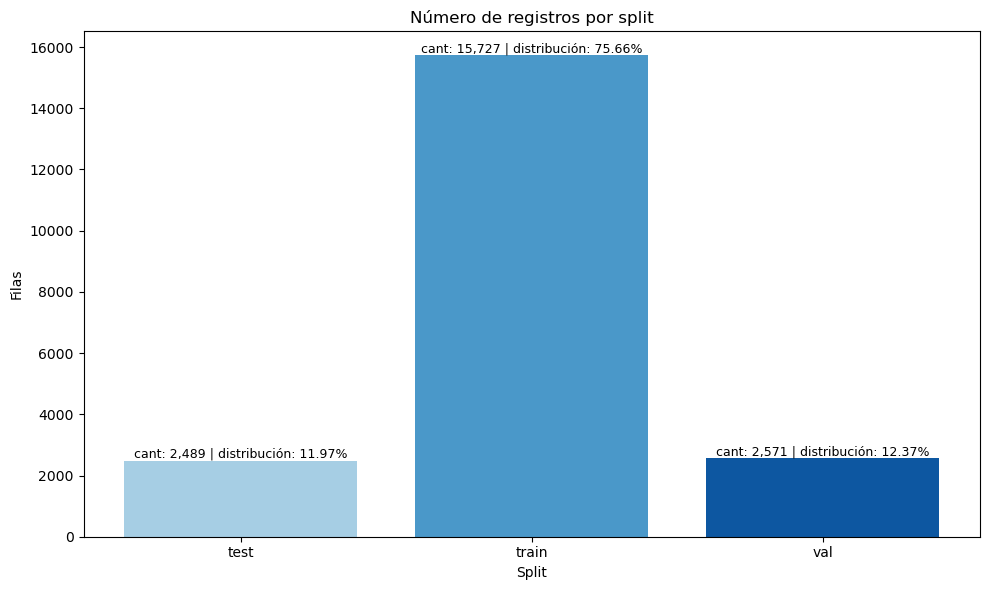

In [26]:
serie = (
    raw_resumen
    .groupby("split")["filas"]
    .sum()
    .reindex(raw_splits)
)

total = serie.sum()
pct = (serie / total * 100).round(2)

plt.figure(figsize=(10,6))
bars = plt.bar(serie.index, serie.values, color=raw_splits_colors)

for bar, count, p in zip(bars, serie.values, pct.values):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"cant: {count:,} | distribución: {p}%",
        ha="center", va="bottom", fontsize=9
    )

plt.title("Número de registros por split")
plt.ylabel("Filas")
plt.xlabel("Split")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


##### Cantidad de Registros por task (y por split)

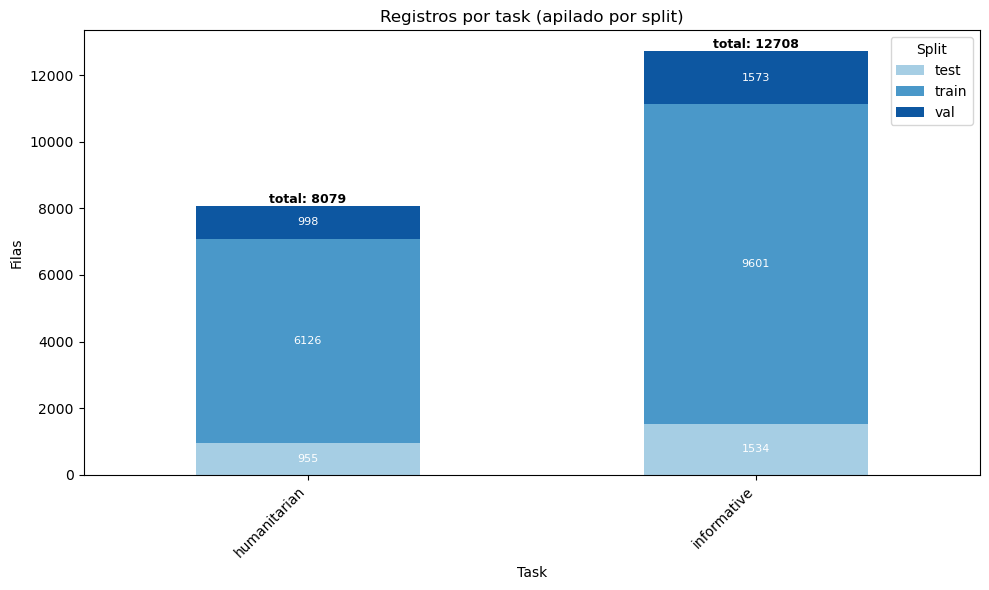

In [27]:
tabla = (
    raw_resumen
    .pivot_table(index="task", columns="split", values="filas", aggfunc="sum")
    .fillna(0)
)

ax = tabla.plot(kind="bar", stacked=True, figsize=(10,6), color=raw_splits_colors)

for cont in ax.containers:
    ax.bar_label(cont, fmt="%.0f", label_type="center", fontsize=8, color="white")

# total por barra encima
totales = tabla.sum(axis=1).values
for bar, total in zip(ax.patches[::len(tabla.columns)], totales):
    ax.text(
        bar.get_x() + bar.get_width()/2,
        total,
        f"total: {total:.0f}",
        ha="center", va="bottom", fontsize=9, fontweight="bold"
    )

plt.title("Registros por task (apilado por split)")
plt.ylabel("Filas")
plt.xlabel("Task")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Split")
plt.tight_layout()
plt.show()


##### Columnas de Anotaciones

Cada archivo TSV en el directorio contiene las siguientes columnas:

| # | **columna** | **descripción** |
|---|-------------|-----------------|
| 1 | event_name | corresponde al nombre del evento |
| 2 | tweet_id | corresponde al identificador real del tweet |
| 3 | image_id | corresponde a una combinación de un tweet_id y un índice concatenados con un guion bajo. Los índices enteros representan distintas imágenes asociadas a un mismo tweet | 
| 4 | tweet_text | corresponde al texto original de un tweet dado |
| 5 | image | corresponde a la ruta relativa de una imagen dentro de la carpeta data_image para un tweet dado |
| 6 | label | para las tareas de *informativeness* y *humanitarian*, corresponde a una etiqueta seleccionada aleatoriamente entre las etiquetas de texto e imagen |
| 7 | label_text | corresponde a la etiqueta específica de la tarea asignada al texto de un tweet dado |
| 8 | label_image | corresponde a la etiqueta específica de la tarea asignada a la imagen de un tweet dado |
| 9 | label_text_image | corresponde a la etiqueta positiva o negativa, que indica si las etiquetas de texto e imagen son iguales |


In [28]:
unique_imgs_por_task = {}

for task in tareas:
    anotaciones = cargar_anotaciones(task=task, data_dir=RAW_DATA_PATH)
    ids = []
    for _, df in anotaciones.items():
        if "image_id" in df.columns:
            ids.append(df["image_id"].dropna().astype(str))
        elif {"tweet_id", "image_index"} <= set(df.columns):
            ids.append((df["tweet_id"].astype(str) + "_" + df["image_index"].astype(str)))
    if ids:
        all_ids = pd.concat(ids, ignore_index=True)
        unique_imgs_por_task[task] = all_ids.nunique()
    else:
        unique_imgs_por_task[task] = 0

print("[INFO] imágenes únicas por task (via image_id):")
for task, n in unique_imgs_por_task.items():
    print(f" - {task}: {n:,}")


[INFO] imágenes únicas por task (via image_id):
 - humanitarian: 8,079
 - informative: 12,708


**resumen general de anotaciones**:

In [29]:
df_res_general_anot = resultado_general_anotaciones(
    raw_data_path=RAW_DATA_PATH,
    tareas=tareas,
    cargar_anotaciones_fn=cargar_anotaciones,
)


[INFO] Calculando resumen general de imágenes por tweet (agregado por task)...

[INFO] Procesando task = humanitarian
 - tweets_totales            : 7,216
 - tweets_con_varias_imagenes: 545 (7.55%)
 - max_imagenes_por_tweet    : 4

[INFO] Procesando task = informative
 - tweets_totales            : 11,400
 - tweets_con_varias_imagenes: 772 (6.77%)
 - max_imagenes_por_tweet    : 4

[INFO] Resumen general completado.


In [30]:
df_res_general_anot


,task,tweets_totales,tweets_con_varias_imagenes,pct_tweets_multi_imagen,max_imagenes_por_tweet
0,humanitarian,7216,545,7.55,4
1,informative,11400,772,6.77,4


**detalle por archivo de anotaciones**:

In [31]:
df_det_archivo_anot = detalle_por_archivo_anotaciones(
    archivos=archivos,
    cargar_tsv_fn=cargar_crisismmd_tsv,
)


[INFO] Construyendo detalle por archivo TSV...

[INFO] Leyendo archivo: data/raw/crisismmd_datasplit_agreed_label/task_informative_text_img_agreed_lab_test.tsv
  - filas                     : 1,534
  - tweets_totales            : 1,534
  - tweets_con_varias_imagenes: 0 (0.00%)
  - max_imagenes_por_tweet    : 1

[INFO] Leyendo archivo: data/raw/crisismmd_datasplit_agreed_label/task_informative_text_img_agreed_lab_dev.tsv
  - filas                     : 1,573
  - tweets_totales            : 1,573
  - tweets_con_varias_imagenes: 0 (0.00%)
  - max_imagenes_por_tweet    : 1

[INFO] Leyendo archivo: data/raw/crisismmd_datasplit_agreed_label/task_humanitarian_text_img_agreed_lab_dev.tsv
  - filas                     : 998
  - tweets_totales            : 998
  - tweets_con_varias_imagenes: 0 (0.00%)
  - max_imagenes_por_tweet    : 1

[INFO] Leyendo archivo: data/raw/crisismmd_datasplit_agreed_label/task_humanitarian_text_img_agreed_lab_train.tsv
  - filas                     : 6,126
  - tweets

In [32]:
df_det_archivo_anot


,archivo,task,split,filas,tweets_totales,tweets_con_varias_imagenes,pct_tweets_multi_imagen,max_imagenes_por_tweet
0,task_informative_text_img_agreed_lab_test.tsv,informative,test,1534,1534,0,0.00,1
1,task_informative_text_img_agreed_lab_dev.tsv,informative,dev,1573,1573,0,0.00,1
2,task_humanitarian_text_img_agreed_lab_dev.tsv,humanitarian,dev,998,998,0,0.00,1
3,task_humanitarian_text_img_agreed_lab_train.tsv,humanitarian,train,6126,5263,545,10.36,4
4,task_humanitarian_text_img_agreed_lab_test.tsv,humanitarian,test,955,955,0,0.00,1
5,task_informative_text_img_agreed_lab_train.tsv,informative,train,9601,8293,772,9.31,4


In [33]:
df_res_split_anot = mostrar_por_split_anotaciones(
    df_detalle=df_det_archivo_anot,
    raw_splits=raw_splits,
)


[INFO] Construyendo resumen por split (a partir de df_detalle)...
[INFO] Resumen por split listo:
   split  n_archivos  n_tasks  filas  tweets_totales  \
0   test           2        2   2489            2489   
1  train           2        2  15727           13556   
2    NaN           2        2   2571            2571   

   tweets_con_varias_imagenes  pct_tweets_multi_imagen  
0                           0                     0.00  
1                        1317                     9.72  
2                           0                     0.00  


In [34]:
df_res_split_anot


,split,n_archivos,n_tasks,filas,tweets_totales,tweets_con_varias_imagenes,pct_tweets_multi_imagen
0,test,2,2,2489,2489,0,0.00
1,train,2,2,15727,13556,1317,9.72
2,NaN,2,2,2571,2571,0,0.00


##### Cargar Anotaciones

In [35]:
print("[INFO] cargar anotaciones")
anotaciones_humanitarian = cargar_anotaciones(task="humanitarian",data_dir=RAW_DATA_PATH)
anotaciones_informative = cargar_anotaciones(task="informative",data_dir=RAW_DATA_PATH)
print(f" - anotaciones_humanitarian: {len(anotaciones_humanitarian)}")
print(f" - anotaciones_informative: {len(anotaciones_informative)}")


[INFO] cargar anotaciones
 - anotaciones_humanitarian: 3
 - anotaciones_informative: 3


##### Distribución de Etiquetas por Split

**Distribución de Etiquetas por Split Humanitaria**:

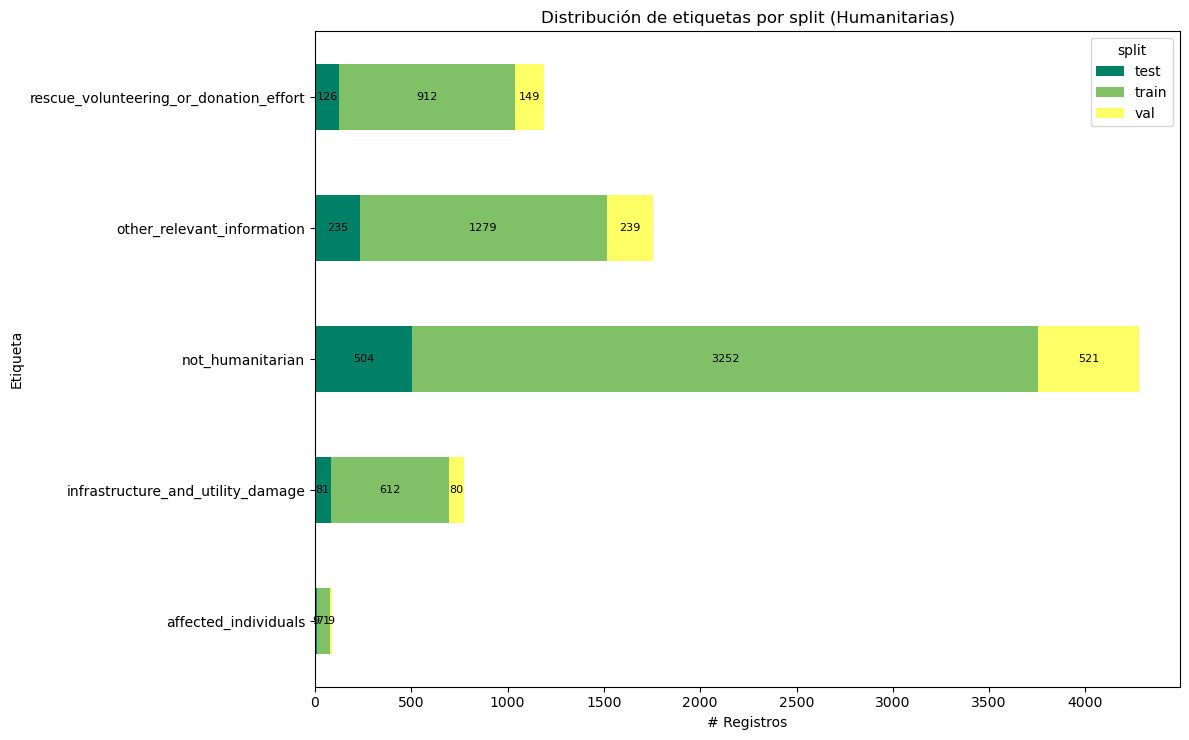

In [36]:
graficar_distribucion_etiquetas_por_split(
    anotaciones_humanitarian, 
    task_name="Humanitarias", 
    mapa_colores="summer"
)


**Distribución de Etiquetas por Split Informativas**:

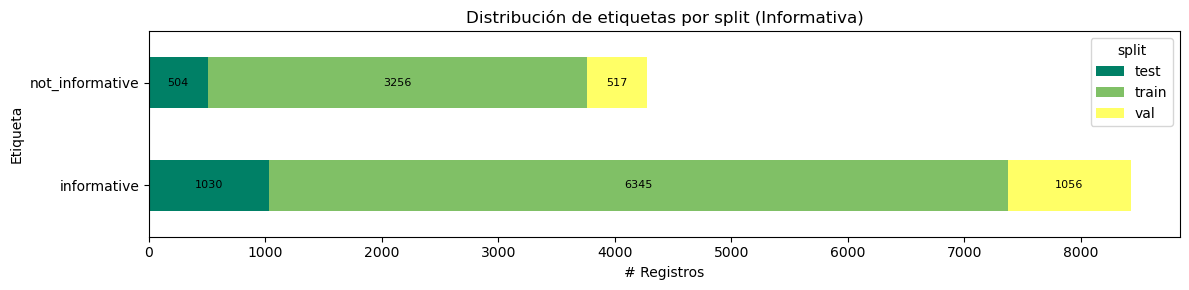

In [37]:
graficar_distribucion_etiquetas_por_split(
    anotaciones_informative, 
    task_name="Informativa", 
    mapa_colores="summer"
)


## Metadata JSON

### Archivos json

In [38]:
root = Path(JSN_DATA_PATH)
print(list(root.iterdir()))


[PosixPath('data/raw/CrisisMMD_v2.0/json/hurricane_irma_final_data.json'), PosixPath('data/raw/CrisisMMD_v2.0/json/._.DS_Store'), PosixPath('data/raw/CrisisMMD_v2.0/json/.DS_Store'), PosixPath('data/raw/CrisisMMD_v2.0/json/hurricane_harvey_final_data.json'), PosixPath('data/raw/CrisisMMD_v2.0/json/._california_wildfires_final_data.json'), PosixPath('data/raw/CrisisMMD_v2.0/json/._mexico_earthquake_final_data.json'), PosixPath('data/raw/CrisisMMD_v2.0/json/._hurricane_maria_final_data.json'), PosixPath('data/raw/CrisisMMD_v2.0/json/iraq_iran_earthquake_final_data.json'), PosixPath('data/raw/CrisisMMD_v2.0/json/._srilanka_floods_final_data.json'), PosixPath('data/raw/CrisisMMD_v2.0/json/hurricane_maria_final_data.json'), PosixPath('data/raw/CrisisMMD_v2.0/json/._hurricane_harvey_final_data.json'), PosixPath('data/raw/CrisisMMD_v2.0/json/california_wildfires_final_data.json'), PosixPath('data/raw/CrisisMMD_v2.0/json/srilanka_floods_final_data.json'), PosixPath('data/raw/CrisisMMD_v2.0/jso

**lista de columnas de archivos .json descargados**:

In [39]:
print("[INFO] estadísticas de archivos json:")
archivos_json = listar_archivos_metadata(RAW_DATA_PATH, ".json")
df_archivos_json = pd.DataFrame(archivos_json)
cols = ["carpeta", "nombre", "registros", "megabytes"]
df_archivos_json[cols].sort_values("carpeta")


[INFO] estadísticas de archivos json:


,carpeta,nombre,registros,megabytes
0,CrisisMMD_v2.0/json,hurricane_irma_final_data.json,4021,19.90
1,CrisisMMD_v2.0/json,hurricane_harvey_final_data.json,3992,18.97
2,CrisisMMD_v2.0/json,iraq_iran_earthquake_final_data.json,496,2.00
3,CrisisMMD_v2.0/json,hurricane_maria_final_data.json,3995,20.41
4,CrisisMMD_v2.0/json,california_wildfires_final_data.json,1486,6.36
5,CrisisMMD_v2.0/json,srilanka_floods_final_data.json,830,3.91
6,CrisisMMD_v2.0/json,mexico_earthquake_final_data.json,1238,6.15


In [40]:
# total de registros en archivos json
total_reg_json = df_archivos_json["registros"].sum()
print(f"[INFO] total de filas físicas en los archivos json: {total_reg_json}")


[INFO] total de filas físicas en los archivos json: 16058


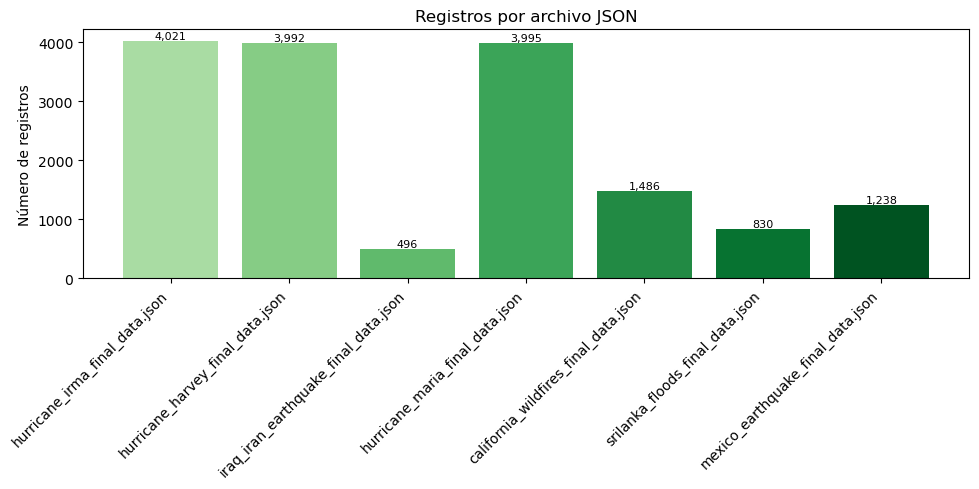

In [41]:
df_plot = pd.DataFrame(archivos_json)
df_plot["registros"] = df_plot["registros"].fillna(0)

# paleta con varios tonos (ajusta cmap y rangos a tu gusto)
colors = plt.cm.Greens(np.linspace(0.35, 0.95, len(df_plot)))

plt.figure(figsize=(10, 5))
bars = plt.bar(df_plot["nombre"], df_plot["registros"], color=colors)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Número de registros")
plt.title("Registros por archivo JSON")

for i, bar in enumerate(bars):
    v = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, v, f"{int(v):,}",
             ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()


**lista de columnas de archivos .json descargados**:

In [42]:
print("[INFO] columnas en archivos json:")
df_archivos_json["columnas"] = df_archivos_json["path"].apply(leer_claves_json)
df_archivos_json["n_columnas"] = df_archivos_json["columnas"].apply(len)
cols = ["carpeta", "nombre", "n_columnas", "columnas"]
df_archivos_json[cols].sort_values("carpeta")


[INFO] columnas en archivos json:


,carpeta,nombre,n_columnas,columnas
0,CrisisMMD_v2.0/json,hurricane_irma_final_data.json,31,"[filter_level, quote_count, retweeted, in_repl..."
1,CrisisMMD_v2.0/json,hurricane_harvey_final_data.json,29,"[filter_level, retweeted, in_reply_to_screen_n..."
2,CrisisMMD_v2.0/json,iraq_iran_earthquake_final_data.json,31,"[filter_level, quote_count, retweeted, in_repl..."
3,CrisisMMD_v2.0/json,hurricane_maria_final_data.json,31,"[filter_level, quote_count, retweeted, in_repl..."
4,CrisisMMD_v2.0/json,california_wildfires_final_data.json,31,"[filter_level, quote_count, retweeted, in_repl..."
5,CrisisMMD_v2.0/json,srilanka_floods_final_data.json,29,"[filter_level, retweeted, in_reply_to_screen_n..."
6,CrisisMMD_v2.0/json,mexico_earthquake_final_data.json,31,"[filter_level, quote_count, retweeted, in_repl..."


**Revisión de Columnas Presentes por JSON**:

In [43]:
df_matriz_columnas_json = mostrar_columnas_json_presentes(df_archivos_json)
display(df_matriz_columnas_json.T)


[INFO] mostrar columnas presentes o ausentes por json:


,0,1,2,3,4,5,6
archivo,hurricane_irma_final_data.json,hurricane_harvey_final_data.json,iraq_iran_earthquake_final_data.json,hurricane_maria_final_data.json,california_wildfires_final_data.json,srilanka_floods_final_data.json,mexico_earthquake_final_data.json
filter_level,1,1,1,1,1,1,1
quote_count,1,0,1,1,1,0,1
retweeted,1,1,1,1,1,1,1
in_reply_to_screen_name,1,1,1,1,1,1,1
possibly_sensitive,1,1,1,1,1,1,1
truncated,1,1,1,1,1,1,1
lang,1,1,1,1,1,1,1
in_reply_to_status_id_str,1,1,1,1,1,1,1
id,1,1,1,1,1,1,1


**notas**:
 - todos los archivos json poseen casi las mismas columnas, con las siguientes excepciones:
 - 7 archivos JSON: 
   - hurricane_irma
   - hurricane_harvey
   - hurricane_maria
   - california_wildfires 
   - mexico_earthquake
   - srilanka_floods
   - iraq_iran_earthquake
  - columnas en común: 30 de 31 columnas aparecen en todos los archivos
  - única columna no universal: display_text_range, solo presente en hurricane_maria, california_wildfires
  - columnas parcialmente ausentes: quote_count y reply_count faltan en hurricane_harvey y srilanka_floods; retweeted_status falta en hurricane_maria y california_wildfires

In [44]:
df_json_unificado = cargar_jsons_unificados(df_archivos_json)


[INFO] cargar dataframe con todos los json:

[INFO] cargar json completo data/raw/CrisisMMD_v2.0/json/hurricane_irma_final_data.json:
 - # líneas físicas 4021:
 - # líneas en dataframe de salida 4021:
 - # filas con error: 0

[INFO] cargar json completo data/raw/CrisisMMD_v2.0/json/hurricane_harvey_final_data.json:
 - # líneas físicas 3992:
 - # líneas en dataframe de salida 3992:
 - # filas con error: 0

[INFO] cargar json completo data/raw/CrisisMMD_v2.0/json/iraq_iran_earthquake_final_data.json:
 - # líneas físicas 496:
 - # líneas en dataframe de salida 496:
 - # filas con error: 0

[INFO] cargar json completo data/raw/CrisisMMD_v2.0/json/hurricane_maria_final_data.json:
 - # líneas físicas 3995:
 - # líneas en dataframe de salida 3995:
 - # filas con error: 0

[INFO] cargar json completo data/raw/CrisisMMD_v2.0/json/california_wildfires_final_data.json:
 - # líneas físicas 1486:
 - # líneas en dataframe de salida 1486:
 - # filas con error: 0

[INFO] cargar json completo data/raw/

**notas**
- se observa que una fila de uno de los archivos json no es un formato json válido y es omitida.
- se cargaron 16057 de 16058 filas json totales

**se agregan algunas estadísticas por registros**:

In [45]:
df_json_unificado["created_at"] = pd.to_datetime(
    df_json_unificado["created_at"],
    format="%a %b %d %H:%M:%S %z %Y",
    errors="coerce",
)
df_json_unificado["text_len"] = df_json_unificado["text"].fillna("").str.len()


**columnas del dataframe con todos lo|s json unificados**:

In [46]:
df_json_unificado.columns


Index(['evento_key', 'aidr', 'contributors', 'coordinates', 'created_at',
       'display_text_range', 'entities', 'extended_entities', 'extended_tweet',
       'favorite_count', 'favorited', 'filter_level', 'geo', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'quote_count', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'reply_count',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'text',
       'timestamp_ms', 'truncated', 'user', 'withheld_in_countries',
       'text_len'],
      dtype='object')

Número de tweets por evento (evento_key)

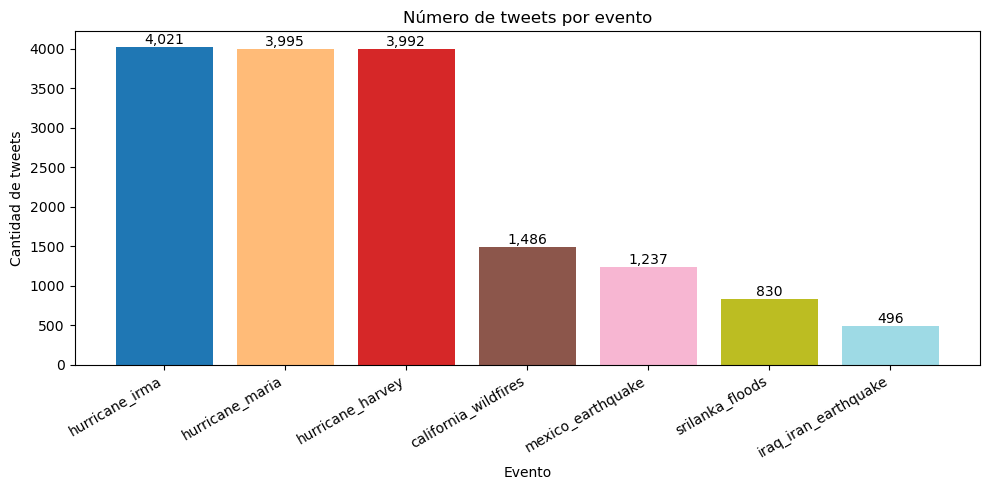

In [47]:
conteo_evento = df_json_unificado["evento_key"].value_counts()

cmap = plt.cm.tab20  # o viridis, plasma, Set3, etc.
colors = cmap(np.linspace(0, 1, len(conteo_evento)))

plt.figure(figsize=(10, 5))
bars = plt.bar(conteo_evento.index, conteo_evento.values, color=colors)
plt.title("Número de tweets por evento")
plt.xlabel("Evento")
plt.ylabel("Cantidad de tweets")
plt.xticks(rotation=30, ha="right")

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, h, f"{int(h):,}", ha="center", va="bottom")

plt.tight_layout()
plt.show()


**evolución diaria de tweets por evento**:

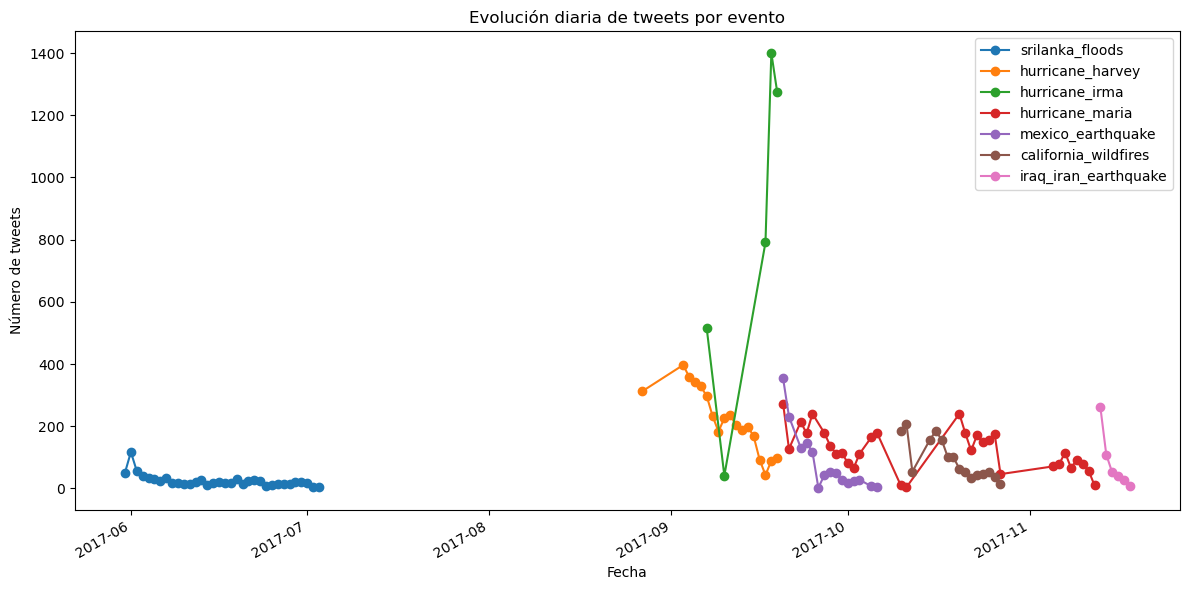

In [48]:
df_json_unificado["date"] = df_json_unificado["created_at"].dt.date

df_ts = (
    df_json_unificado
    .groupby(["date", "evento_key"])
    .size()
    .reset_index(name="n_tweets")
)

plt.figure(figsize=(12, 6))

for evento in df_ts["evento_key"].unique():
    datos_ev = df_ts[df_ts["evento_key"] == evento]
    plt.plot(datos_ev["date"], datos_ev["n_tweets"], marker="o", label=evento)

plt.title("Evolución diaria de tweets por evento")
plt.xlabel("Fecha")
plt.ylabel("Número de tweets")
plt.xticks(rotation=30, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


**notas**:
- se observa que algunos eventos son concurrentes y otros en temporalidades completamente distintas.
- desde la perspectiva de los siguientes análisis es posible que esta inforamción no sea util, pero se dejará gráfico por si llega a ser útil.

## Imágenes

In [49]:
df_imagenes = recorrer_archivos_imagenes()
#df_imagenes.head()
print()
print("[INFO] revisión de extensiones de imágenes:")
print(f" - extensiones únicas: {df_imagenes['extension'].value_counts()}")


[INFO] explorar imágenes:
 - registros omitidos: 0
 - registros cargados: 18104

[INFO] revisión de extensiones de imágenes:
 - extensiones únicas: extension
.jpg    17909
.png      195
Name: count, dtype: int64


**notas**
- no se omiten imágenes y hay en total 18.104
- se observa que la mayoría son jpg y hay un conjunto menor de imágenes en formato png
- teniendo en cuenta exploraciones anteriores, se tiene:

cantidades:

| **ítem dataset** | cantidad |
|------------------|----------|
| anotaciones totales | 20.787 |
| anotaciones humanitarias | 8.079 |
| anotaciones informativas | 12.708 |
| registros json totales | 16.057 |
| imágenes totales | 18.104 |

**columas de df_imagenes**:

In [50]:
df_imagenes.columns


Index(['clave', 'extension', 'evento_key', 'ruta_rel', 'ruta_abs',
       'tam_bytes'],
      dtype='object')

In [51]:
print("[INFO] revisión de evento")
print(f" - evento únicos: {df_imagenes['evento_key'].value_counts()}")


[INFO] revisión de evento
 - evento únicos: evento_key
hurricane_maria         4557
hurricane_irma          4506
hurricane_harvey        4436
california_wildfires    1605
mexico_earthquake       1381
srilanka_floods         1022
iraq_iran_earthquake     597
Name: count, dtype: int64


## Preprocesamiento

### Particiones

#### Particionamiento para tweets humanitarios

In [52]:
X_train_hum, y_train_hum, path_image_train_hum = leer_data(anotaciones_humanitarian,split="train")
X_val_hum, y_val_hum, path_image_val_hum = leer_data(anotaciones_humanitarian,split="val")
X_test_hum, y_test_hum, path_image_test_hum = leer_data(anotaciones_humanitarian,split="test")
print("[INFO] Carga de dataset")
print(" - train:")
print(f"   - X_train: {len(X_train_hum)}")
print(f"   - y_train: {len(y_train_hum)}")
print(f"   - path_image_train: {len(path_image_train_hum)}")
print(" - dev:")
print(f"   - X_val: {len(X_val_hum)}")
print(f"   - y_val: {len(y_val_hum)}")
print(f"   - path_image_val: {len(path_image_val_hum)}")
print(" - test:")
print(f"   - X_test: {len(X_test_hum)}")
print(f"   - y_test: {len(y_test_hum)}")
print(f"   - path_image_test: {len(path_image_test_hum)}")


[INFO] Carga de dataset
 - train:
   - X_train: 6126
   - y_train: 6126
   - path_image_train: 6126
 - dev:
   - X_val: 998
   - y_val: 998
   - path_image_val: 998
 - test:
   - X_test: 955
   - y_test: 955
   - path_image_test: 955


#### Particionamiento para tweets Informativos

In [53]:
X_train_inf, y_train_inf, path_image_train_inf = leer_data(anotaciones_informative,split="train")
X_val_inf, y_val_inf, path_image_val_inf = leer_data(anotaciones_informative,split="val")
X_test_inf, y_test_inf, path_image_test_inf = leer_data(anotaciones_informative,split="test")
print("[INFO] Carga de dataset")
print(" - train:")
print(f"   - X_train: {len(X_train_inf)}")
print(f"   - y_train: {len(y_train_inf)}")
print(f"   - path_image_train: {len(path_image_train_inf)}")
print(" - dev:")
print(f"   - X_val: {len(X_val_inf)}")
print(f"   - y_val: {len(y_val_inf)}")
print(f"   - path_image_val: {len(path_image_val_inf)}")
print(" - test:")
print(f"   - X_test: {len(X_test_inf)}")
print(f"   - y_test: {len(y_test_inf)}")
print(f"   - path_image_test: {len(path_image_test_inf)}")


[INFO] Carga de dataset
 - train:
   - X_train: 9601
   - y_train: 9601
   - path_image_train: 9601
 - dev:
   - X_val: 1573
   - y_val: 1573
   - path_image_val: 1573
 - test:
   - X_test: 1534
   - y_test: 1534
   - path_image_test: 1534


### Limpieza Datos

#### Limpieza de URL

In [54]:
# Opcional (Si prefiere eliminar las urls de los tweets puede usar el siguiente código):
X_train_hum = X_train_hum.apply(remover_urls)
X_val_hum = X_val_hum.apply(remover_urls)
X_test_hum = X_test_hum.apply(remover_urls)


In [55]:
def construir_df_multimodal(X, y, image_paths, tweet_ids=None):
    """
    Construye un DataFrame estándar a partir de las listas del split.

    Parámetros
    ----------
    X : list[str]
        Textos de los tweets.
    y : list[str] o list[int]
        Etiquetas (idealmente strings de clase).
    image_paths : list[str]
        Rutas relativas de las imágenes.
    tweet_ids : list[str] o list[int], opcional
        Identificador de tweet (si lo tienes; si no, se genera un índice artificial).

    Retorna
    -------
    pd.DataFrame con columnas:
        - tweet_text
        - image
        - label
        - tweet_id (opcional si se entrega)
    """
    assert len(X) == len(y) == len(image_paths), "Longitudes inconsistentes entre X, y e image_paths"

    data = {
        "tweet_text": list(X),
        "image": list(image_paths),
        "label": list(y),
    }

    if tweet_ids is not None:
        assert len(tweet_ids) == len(X), "tweet_ids debe tener misma longitud que X"
        data["tweet_id"] = list(tweet_ids)

    df = pd.DataFrame(data)
    return df


In [56]:
df_train_hum = construir_df_multimodal(
    X_train_hum,
    y_train_hum,
    path_image_train_hum,
)

df_val_hum = construir_df_multimodal(
    X_val_hum,
    y_val_hum,
    path_image_val_hum,
)

df_test_hum = construir_df_multimodal(
    X_test_hum,
    y_test_hum,
    path_image_test_hum,
)

print("[INFO] DataFrames humanitarios")
print(" - train:", df_train_hum.shape)
print(" - val  :", df_val_hum.shape)
print(" - test :", df_test_hum.shape)


[INFO] DataFrames humanitarios
 - train: (6126, 3)
 - val  : (998, 3)
 - test : (955, 3)


Definir el diccionario de etiquetas label2idx

In [75]:
# union de etiquetas en todos los splits
unique_labels = sorted(
    set(df_train_hum["label"]) |
    set(df_val_hum["label"]) |
    set(df_test_hum["label"])
)

label2idx = {label: i for i, label in enumerate(unique_labels)}
idx2label = {i: label for label, i in label2idx.items()}

print("[INFO] Mapeo de etiquetas (humanitarian):")
for k, v in label2idx.items():
    print(f"  {k} -> {v}")


[INFO] Mapeo de etiquetas (humanitarian):
  affected_individuals -> 0
  infrastructure_and_utility_damage -> 1
  not_humanitarian -> 2
  other_relevant_information -> 3
  rescue_volunteering_or_donation_effort -> 4


# Parte 1: Naive Fusion for Multimodal Models

## Enunciado

### Naive Fusion

Usted debe realizar los siguientes experimentos:

* **Concatenar** las representaciones de **imagen y texto**: primero fusiónalas de forma sencilla (`word2vec` para representar texto y `EfficientNet` para representar imagenes)  y pásalas por una **capa MLP** (perceptrón multicapa).  
* **Concatenar** las representaciones de **imagen y texto**: esta vez fusionando representaciones neuronales obtenidas al procesar texto (con un transformer como `RoBERTa`) e imágen (`EfficientNet`). Utiliza el vector `<s>` proveniente del modelo de texto `RoBERTa` y la representación generada por `EfficientNet` para la imagen.  
* Finalmente, cuando uses tanto el codificador de texto (`RoBERTa`) como el de imagen (`EfficientNet`), realiza otro experimento **descongelando los parámetros de toda la red** durante el *fine-tuning*.  
* **No obligatorio**: También puedes probar con una versión de `EfficientNet` ya fine-tuneada en un dataset de reconocimiento de imagenes de crisis como en la tarea 2, y observar las diferencias.  
  Esto podría **mejorar el rendimiento** en el contexto del dataset de **crisis**, ya que las nuevas representaciones visuales pueden aportar señales útiles.  

### Funciones útiles


Se recomienda implementar las siguientes funciones y clases de apoyo:

* Una clase `MultimodalDataset(torch.utils.data.Dataset)` modular, capaz de manejar los diferentes tipos de **codificaciones** (texto e imagen) utilizando `torch.utils.data.Dataset`.  
* Una función `training()` que contenga el **bucle de entrenamiento**.  
* Una clase `MultimodalClassifier(nn.Module)` que defina la **arquitectura de la red multimodal** propiamente tal.  

### *Data Augmentation* para la modalidad visual

Utiliza transformaciones de datos para **mejorar la generalización** del modelo en la modalidad de imagen.  

```python
rotation_value = 0.2
# Image transformations for EfficientNet
# For validation/test
self.image_transform = transforms.Compose([
        transforms.CenterCrop(self.image_size),
        # transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

# Apply data augmentation at training
self.image_transform_data_augmentation = transforms.Compose([
    # transforms.RandomRotation(angle_rotation) # check if this works
    transforms.RandomResizedCrop(self.image_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(degrees=rotation_value * 360),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
```

También, no olvidar regualizadores como `Torch.nn.dropout` en las capas del modelo multimodal.

## 1.2. Representaciones Fusionadas con `Word2Vec` + `EfficientNet`


* **Concatenar** las representaciones de **imagen y texto**: primero fusiónalas de forma sencilla (`word2vec` para representar texto y `EfficientNet` para representar imagenes)  y pásalas por una **capa MLP** (perceptrón multicapa).  

### 1.2.1. Clase `MultiModalDataset`

In [58]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
from pathlib import Path

class MultimodalDataset(Dataset):
    """
    Dataset multimodal basado en las particiones ya creadas:
    X_* (texto), y_* (label), path_image_* (ruta relativa de imagen).
    
    Soporta dos modos de texto:
    - text_encoder.type == "word2vec"  -> usa text_encoder_fn(text) -> tensor [text_dim]
    - text_encoder.type == "roberta"   -> usa tokenizer de Hugging Face -> input_ids, attention_mask
    """
    def __init__(
        self,
        texts,
        labels,
        image_paths,
        label2idx,
        config,
        split="train",
        image_root=None,
        text_encoder_fn=None,  # para Word2Vec
        tokenizer=None,        # para RoBERTa
    ):
        """
        Parámetros
        ----------
        texts : list[str]
            Lista de textos (tweet_text).
        labels : list[str]
            Lista de etiquetas (string de clase).
        image_paths : list[str]
            Lista de rutas relativas de imágenes (respecto a image_root).
        label2idx : dict
            Mapeo etiqueta string -> índice entero.
        config : dict
            Configuración (misma estructura que el JSON).
        split : str
            'train', 'val' o 'test'; controla si hay data augmentation.
        image_root : str o Path
            Carpeta base donde viven las imágenes (ej. IMG_DATA_PATH).
        text_encoder_fn : callable
            Solo para Word2Vec: fn(str) -> torch.Tensor [text_dim].
        tokenizer : transformers.PreTrainedTokenizer
            Solo para RoBERTa.
        """
        assert len(texts) == len(labels) == len(image_paths), "Longitudes inconsistentes en dataset multimodal."
        self.texts = list(texts)
        self.labels = list(labels)
        self.image_paths = list(image_paths)

        self.label2idx = label2idx
        self.config = config
        self.split = split
        self.image_root = Path(image_root) if image_root is not None else Path(".")

        self.text_mode = config["text_encoder"]["type"]
        self.text_encoder_fn = text_encoder_fn
        self.tokenizer = tokenizer

        image_size = config["data"]["image_size"]
        rotation_value = config["data"].get("rotation_value", 0.2)

        # Transformaciones para valid/test
        self.image_transform = transforms.Compose([
            transforms.CenterCrop(image_size),
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225],
            ),
        ])

        # Data augmentation para train
        self.image_transform_data_augmentation = transforms.Compose([
            transforms.RandomResizedCrop(image_size),
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(degrees=rotation_value * 360),
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225],
            ),
        ])

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label_str = self.labels[idx]
        rel_img_path = self.image_paths[idx]

        # --- Imagen ---
        img_path = self.image_root / rel_img_path
        #image = Image.open(img_path).convert("RGB")
        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print("[WARN] Error al abrir imagen:", img_path, e)
            # ejemplo: devolver una imagen negra
            image = Image.new("RGB", (256, 256), (0, 0, 0))

        if self.split == "train":
            image = self.image_transform_data_augmentation(image)
        else:
            image = self.image_transform(image)

        item = {"image": image}

        # --- Texto ---
        if self.text_mode == "word2vec":
            assert self.text_encoder_fn is not None, "Se requiere text_encoder_fn para modo 'word2vec'."
            text_emb = self.text_encoder_fn(text)  # [text_dim]
            item["text_emb"] = text_emb

        elif self.text_mode == "roberta":
            assert self.tokenizer is not None, "Se requiere tokenizer de RoBERTa para modo 'roberta'."
            encoded = self.tokenizer(
                text,
                padding="max_length",
                truncation=True,
                max_length=128,
                return_tensors="pt",
            )
            item["input_ids"] = encoded["input_ids"].squeeze(0)
            item["attention_mask"] = encoded["attention_mask"].squeeze(0)
        else:
            raise ValueError(f"Modo de texto no soportado: {self.text_mode}")

        # --- Label ---
        label_idx = self.label2idx[label_str]
        item["label"] = torch.tensor(label_idx, dtype=torch.long)

        return item


**notas**:
- clase MultimodalDataset: soporta Word2Vec y RoBERTa
  - columnas esperadas: tweet_text, image, label
  - según config["text_encoder"]["type"] decide qué devolver:
    - "word2vec" → devuelve text_emb
    - "roberta" → devuelve input_ids, attention_mask

### 1.2.2. Text encoder para Word2Vec

In [59]:
def build_word2vec_text_encoder(w2v_model, device=None):
    embedding_dim = w2v_model.vector_size
    token_pattern = re.compile(r"\w+", re.UNICODE)

    def encode(text):
        tokens = token_pattern.findall(text.lower())
        vecs = []
        for tok in tokens:
            if tok in w2v_model.wv:
                vecs.append(w2v_model.wv[tok])
        if len(vecs) == 0:
            emb = np.zeros(embedding_dim, dtype=np.float32)
        else:
            emb = np.mean(vecs, axis=0).astype(np.float32)
        # SIEMPRE en CPU
        return torch.tensor(emb, dtype=torch.float32)

    return encode


Construir DataLoaders directamente desde tus particiones

In [60]:
from torch.utils.data import DataLoader
from transformers import AutoTokenizer

def build_dataloaders_from_partitions(
    config,
    X_train, y_train, path_train,
    X_val, y_val, path_val,
    X_test, y_test, path_test,
    label2idx,
    image_root,
    w2v_model=None,
    device="cpu",
):
    """
    Construye Datasets y DataLoaders directamente desde las particiones
    generadas con leer_data(...), usando la clase MultimodalDataset.

    Soporta:
    - text_encoder.type == 'word2vec' (requiere w2v_model)
    - text_encoder.type == 'roberta'  (crea AutoTokenizer internamente)
    """
    
    text_type = config["text_encoder"]["type"]
    batch_size = config["training"]["batch_size"]
    num_workers = config["data"].get("num_workers", 0)

    # --- Encoder de texto (dataset) ---
    text_encoder_fn = None
    tokenizer = None

    if text_type == "word2vec":
        assert w2v_model is not None, "Se requiere w2v_model para modo 'word2vec'."
        text_encoder_fn = build_word2vec_text_encoder(w2v_model, device=device)
    elif text_type == "roberta":
        model_name = config["text_encoder"]["model_name"]
        tokenizer = AutoTokenizer.from_pretrained(model_name)
    else:
        raise ValueError(f"Modo de texto no soportado: {text_type}")

    # --- Datasets ---
    train_ds = MultimodalDataset(
        texts=X_train,
        labels=y_train,
        image_paths=path_train,
        label2idx=label2idx,
        config=config,
        split="train",
        image_root=image_root,
        text_encoder_fn=text_encoder_fn,
        tokenizer=tokenizer,
    )
    val_ds = MultimodalDataset(
        texts=X_val,
        labels=y_val,
        image_paths=path_val,
        label2idx=label2idx,
        config=config,
        split="val",
        image_root=image_root,
        text_encoder_fn=text_encoder_fn,
        tokenizer=tokenizer,
    )
    test_ds = MultimodalDataset(
        texts=X_test,
        labels=y_test,
        image_paths=path_test,
        label2idx=label2idx,
        config=config,
        split="test",
        image_root=image_root,
        text_encoder_fn=text_encoder_fn,
        tokenizer=tokenizer,
    )

    # --- DataLoaders ---
    dataloaders = {
        "train": DataLoader(train_ds, batch_size=batch_size, shuffle=True,  num_workers=num_workers),
        "val":   DataLoader(val_ds,   batch_size=batch_size, shuffle=False, num_workers=num_workers),
        "test":  DataLoader(test_ds,  batch_size=batch_size, shuffle=False, num_workers=num_workers),
    }

    return dataloaders


### 1.2.3. Clase `MultimodalClassifier`

In [61]:
class MultimodalClassifier(nn.Module):
    def __init__(self, config, num_classes):
        super().__init__()

        self.config = config
        txt_cfg = config["text_encoder"]
        img_cfg = config["image_encoder"]
        fus_cfg = config["fusion"]

        self.text_type = txt_cfg["type"]

        # ---- TEXT ENCODER ----
        if self.text_type == "word2vec":
            # Dim viene directamente del JSON
            self.text_emb_dim = txt_cfg["embedding_dim"]
            self.text_encoder = None  # el encoder queda fuera (en el dataset)
            self.fine_tune_text = False

        elif self.text_type == "roberta":
            model_name = txt_cfg["model_name"]
            self.text_encoder = AutoModel.from_pretrained(model_name)
            self.text_emb_dim = self.text_encoder.config.hidden_size
            self.fine_tune_text = not txt_cfg.get("freeze", True)

            if not self.fine_tune_text:
                for p in self.text_encoder.parameters():
                    p.requires_grad = False
        else:
            raise ValueError(f"Text encoder no soportado: {self.text_type}")

        # ---- IMAGE ENCODER (EfficientNet) ----
        if img_cfg["type"] == "efficientnet_b0":
            weights = models.EfficientNet_B0_Weights.DEFAULT if img_cfg.get("pretrained", True) else None
            backbone = models.efficientnet_b0(weights=weights)
            self.image_emb_dim = backbone.classifier[1].in_features  # 1280
        else:
            raise ValueError(f"Image encoder no soportado: {img_cfg['type']}")

        self.cnn_features = backbone.features
        self.cnn_pool = nn.AdaptiveAvgPool2d(1)

        # Carga opcional de checkpoint fine-tuneado en crisis
        if img_cfg.get("fine_tuned_crisis", False) and img_cfg.get("checkpoint_path"):
            print(f"[INFO] Cargando pesos de EfficientNet fine-tuneados desde {img_cfg['checkpoint_path']}")
            state = torch.load(img_cfg["checkpoint_path"], map_location="cpu")
            self.load_state_dict(state, strict=False)

        self.fine_tune_image = not img_cfg.get("freeze", True)
        if not self.fine_tune_image:
            for p in self.cnn_features.parameters():
                p.requires_grad = False

        # ---- FUSIÓN + MLP ----
        fusion_dim = self.text_emb_dim + self.image_emb_dim
        hidden_dim = fus_cfg["mlp_hidden_dim"]
        dropout_p = fus_cfg.get("dropout_p", 0.5)

        self.mlp = nn.Sequential(
            nn.Linear(fusion_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_p),
            nn.Linear(hidden_dim, num_classes),
        )

    def forward(self, image, text_emb=None, input_ids=None, attention_mask=None):
        # ---- Imagen -> features ----
        x = self.cnn_features(image)
        x = self.cnn_pool(x)            # [B, C, 1, 1]
        x = x.view(x.size(0), -1)       # [B, image_emb_dim]

        # ---- Texto -> embedding ----
        if self.text_type == "word2vec":
            # text_emb ya viene calculado desde el Dataset
            assert text_emb is not None, "Se requiere text_emb para modo word2vec"
            txt = text_emb
        else:
            # RoBERTa: usar vector <s> (posición 0)
            assert input_ids is not None and attention_mask is not None
            out = self.text_encoder(
                input_ids=input_ids,
                attention_mask=attention_mask,
            )
            # out.last_hidden_state: [B, seq_len, hidden_size]
            txt = out.last_hidden_state[:, 0, :]  # <s> token

        fused = torch.cat([x, txt], dim=1)
        logits = self.mlp(fused)
        return logits


**notas**:
 - Clasificador multimodal:
    - Texto: Word2Vec (emb fijo) o RoBERTa (encoder dentro del modelo)
    - Imagen: EfficientNet (features + pooling)
    - Fusión: concatenación + MLP

Creación de DataLoaders a partir del config

Optimizer + scheduler a partir del JSON

In [62]:


def build_optimizer_and_scheduler(model, config):
    train_cfg = config["training"]
    lr = train_cfg["lr"]
    weight_decay = train_cfg.get("weight_decay", 0.0)
    opt_name = train_cfg.get("optimizer", "adamw").lower()

    if opt_name == "adamw":
        optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    elif opt_name == "sgd":
        optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay, momentum=0.9)
    else:
        raise ValueError(f"Optimizador no soportado: {opt_name}")

    sched_cfg = train_cfg.get("scheduler", {"type": "none"})
    sched_type = sched_cfg.get("type", "none").lower()

    if sched_type == "step":
        scheduler = optim.lr_scheduler.StepLR(
            optimizer,
            step_size=sched_cfg.get("step_size", 3),
            gamma=sched_cfg.get("gamma", 0.1),
        )
    elif sched_type == "none":
        scheduler = None
    else:
        raise ValueError(f"Scheduler no soportado: {sched_type}")

    return optimizer, scheduler


Función training()

In [63]:


def training(model, dataloaders, optimizer, scheduler, device, num_epochs):
    """
    Bucle de entrenamiento genérico para el modelo multimodal.
    """
    criterion = CrossEntropyLoss()
    model.to(device)

    history = {
        "train_loss": [],
        "train_acc": [],
        "val_loss": [],
        "val_acc": [],
    }

    best_val_acc = 0.0
    best_wts = copy.deepcopy(model.state_dict())

    for epoch in range(num_epochs):
        print(f"\n[Epoch {epoch+1}/{num_epochs}]")

        for phase in ["train", "val"]:
            if phase == "train":
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0
            running_samples = 0

            pbar = tqdm(dataloaders[phase], desc=phase, leave=False)
            for batch in pbar:
                images = batch["image"].to(device)
                labels = batch["label"].to(device)

                optimizer.zero_grad()

                if model.text_type == "word2vec":
                    text_emb = batch["text_emb"].to(device)
                    fwd_kwargs = {"image": images, "text_emb": text_emb}
                else:
                    input_ids = batch["input_ids"].to(device)
                    attention_mask = batch["attention_mask"].to(device)
                    fwd_kwargs = {
                        "image": images,
                        "input_ids": input_ids,
                        "attention_mask": attention_mask,
                    }

                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(**fwd_kwargs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)

                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * labels.size(0)
                running_corrects += (preds == labels).sum().item()
                running_samples += labels.size(0)

            epoch_loss = running_loss / running_samples
            epoch_acc = running_corrects / running_samples

            history[f"{phase}_loss"].append(epoch_loss)
            history[f"{phase}_acc"].append(epoch_acc)

            print(f"  {phase} - loss: {epoch_loss:.4f} | acc: {epoch_acc:.4f}")

            if phase == "train" and scheduler is not None:
                scheduler.step()

            if phase == "val" and epoch_acc > best_val_acc:
                best_val_acc = epoch_acc
                best_wts = copy.deepcopy(model.state_dict())
                print(f"  [INFO] Mejor modelo actualizado (val_acc={best_val_acc:.4f})")

    print(f"\n[INFO] Entrenamiento finalizado. Mejor val_acc = {best_val_acc:.4f}")
    model.load_state_dict(best_wts)
    return model, history


run_experiment(config, ...)

In [64]:
from sklearn.metrics import classification_report

def run_experiment_from_partitions(
    config,
    X_train, y_train, path_train,
    X_val, y_val, path_val,
    X_test, y_test, path_test,
    image_root,
    label2idx,
    w2v_model=None,
    device=None,
):
    """
    Versión de alto nivel de run_experiment que trabaja
    directamente con las particiones X_*, y_*, path_image_*.

    No toca ninguna de tus funciones existentes (cargar_anotaciones, leer_data, etc.).
    """
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # 1) DataLoaders
    dataloaders = build_dataloaders_from_partitions(
        config=config,
        X_train=X_train, y_train=y_train, path_train=path_train,
        X_val=X_val,     y_val=y_val,     path_val=path_val,
        X_test=X_test,   y_test=y_test,   path_test=path_test,
        label2idx=label2idx,
        image_root=image_root,
        w2v_model=w2v_model,
        device=device,
    )

    # 2) Modelo
    num_classes = len(label2idx)
    model = MultimodalClassifier(config=config, num_classes=num_classes)

    # 3) Optimizador y scheduler
    optimizer, scheduler = build_optimizer_and_scheduler(model, config)
    num_epochs = config["training"]["num_epochs"]

    # 4) Entrenamiento
    model, history = training(
        model=model,
        dataloaders=dataloaders,
        optimizer=optimizer,
        scheduler=scheduler,
        device=device,
        num_epochs=num_epochs,
    )

    # 5) Evaluación en test
    idx2label = {v: k for k, v in label2idx.items()}
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in dataloaders["test"]:
            images = batch["image"].to(device)
            labels = batch["label"].to(device)

            if model.text_type == "word2vec":
                text_emb = batch["text_emb"].to(device)
                outputs = model(image=images, text_emb=text_emb)
            else:  # roberta
                input_ids = batch["input_ids"].to(device)
                attention_mask = batch["attention_mask"].to(device)
                outputs = model(
                    image=images,
                    input_ids=input_ids,
                    attention_mask=attention_mask,
                )

            preds = outputs.argmax(dim=1)
            all_preds.extend(preds.cpu().tolist())
            all_labels.extend(labels.cpu().tolist())

    target_names = [idx2label[i] for i in range(len(idx2label))]
    print("\n[TEST] Classification report:")
    print(classification_report(all_labels, all_preds, target_names=target_names))

    return model, history, (all_labels, all_preds)


**notas**:
- esta función permite pasar directamente el JSON (como dict) y lanzar cualquiera de los experimentos

Experimentos

In [65]:


# 1) Construir corpus de entrenamiento para Word2Vec
sentences_w2v = [simple_preprocess(text) for text in X_train_hum]
print("[INFO] Oraciones para Word2Vec:", len(sentences_w2v))

# 2) Entrenar modelo Word2Vec
w2v_model = Word2Vec(
    sentences=sentences_w2v,
    vector_size=300,   # dimensión del embedding
    window=5,
    min_count=2,
    workers=4,
    sg=1,              # 1 = skip-gram, 0 = CBOW
    epochs=12,         # num_epochs a 10–12 para que el MLP de fusión tenga más tiempo de aprender.
)

print("[INFO] Modelo Word2Vec entrenado.")
print(" - vector_size:", w2v_model.vector_size)
print(" - vocab_size :", len(w2v_model.wv))


[INFO] Oraciones para Word2Vec: 6126
[INFO] Modelo Word2Vec entrenado.
 - vector_size: 300
 - vocab_size : 5492


1.1. Experimento 1: Word2Vec + EfficientNet (congelado)

In [66]:
config_w2v_effnet = {
    "exp_name": "humanitarian_w2v_effnet",
    "text_encoder": {
        "type": "word2vec",
        "embedding_dim": w2v_model.vector_size,
        "freeze": True
    },
    "image_encoder": {
        "type": "efficientnet_b0",
        "pretrained": True,
        "fine_tuned_crisis": False,
        "checkpoint_path": None,
        "freeze": True
    },
    "fusion": {
        "type": "concat",
        "mlp_hidden_dim": 512,
        "dropout_p": 0.5
    },
    "training": {
        "batch_size": 128,
        "num_epochs": 8,
        "lr": 1e-4,
        "weight_decay": 1e-4,
        "optimizer": "adamw",
        "scheduler": {
            "type": "step",
            "step_size": 3,
            "gamma": 0.1
        }
    },
    "data": {
        "image_size": 224,
        "rotation_value": 0.2,
        "num_workers": 0
    }
}


1.2. Experimento 2: RoBERTa + EfficientNet (congelado)

In [67]:
config_roberta_effnet_frozen = {
  "exp_name": "roberta_effnet_frozen",
  "text_encoder": {
    "type": "roberta",
    "model_name": "roberta-base",
    "freeze": True
  },
  "image_encoder": {
    "type": "efficientnet_b0",
    "pretrained": True,
    "fine_tuned_crisis": False,
    "checkpoint_path": None,
    "freeze": True
  },
  "fusion": {
    "type": "concat",
    "mlp_hidden_dim": 512,
    "dropout_p": 0.5
  },
  "training": {
    "batch_size": 16,
    "num_epochs": 5,
    "lr": 2e-5,
    "weight_decay": 0.01,
    "optimizer": "adamw",
    "scheduler": {
      "type": "step",
      "step_size": 2,
      "gamma": 0.1
    }
  },
  "data": {
    "image_size": 224,
    "rotation_value": 0.2,
    "num_workers": 4
  }
}


Experimento 3: RoBERTa + EfficientNet (fine-tuning total)

In [68]:
config_roberta_effnet_full = {
  "exp_name": "roberta_effnet_full_finetune",
  "text_encoder": {
    "type": "roberta",
    "model_name": "roberta-base",
    "freeze": False
  },
  "image_encoder": {
    "type": "efficientnet_b0",
    "pretrained": True,
    "fine_tuned_crisis": False,
    "checkpoint_path": None,
    "freeze": False
  },
  "fusion": {
    "type": "concat",
    "mlp_hidden_dim": 512,
    "dropout_p": 0.5
  },
  "training": {
    "batch_size": 8,
    "num_epochs": 5,
    "lr": 1e-5,
    "weight_decay": 0.01,
    "optimizer": "adamw",
    "scheduler": {
      "type": "step",
      "step_size": 2,
      "gamma": 0.1
    }
  },
  "data": {
    "image_size": 224,
    "rotation_value": 0.2,
    "num_workers": 4
  }
}


In [69]:
# cargar configs desde archivos JSON (o diccionarios en el notebook)
#cfg_w2v = json.load(config_w2v_effnet)
#cfg_rob_frozen = json.load(config_roberta_effnet_frozen)
#cfg_rob_full = json.load(config_roberta_effnet_full)
print(device)


mps


In [70]:
device = torch.device("cpu")
print("[INFO] Usando device:", device)


[INFO] Usando device: cpu


In [71]:
from pathlib import Path

# Raíz del dataset, NO apuntes a data_image directamente
IMG_DATA_ROOT = Path("data/raw/CrisisMMD_v2.0")

dataloaders = build_dataloaders_from_partitions(
    config=config_w2v_effnet,
    X_train=X_train_hum, y_train=y_train_hum, path_train=path_image_train_hum,
    X_val=X_val_hum,     y_val=y_val_hum,     path_val=path_image_val_hum,
    X_test=X_test_hum,   y_test=y_test_hum,   path_test=path_image_test_hum,
    label2idx=label2idx,
    image_root=MMD_DATA_PATH,
    w2v_model=w2v_model,
    device=device,
)


In [79]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train_hum)  # o concatena train+val si prefieres


# union de etiquetas en todos los splits
unique_labels = sorted(
    set(df_train_hum["label"]) |
    set(df_val_hum["label"]) |
    set(df_test_hum["label"])
)

label2idx = {label: i for i, label in enumerate(unique_labels)}
idx2label = {i: label for label, i in label2idx.items()}

print("[INFO] Mapeo de etiquetas (humanitarian):")
for k, v in label2idx.items():
    print(f"  {k} -> {v}")

image_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
])

class SimpleLabelEncoder:
    def __init__(self, label2idx):
        self.label2idx = label2idx
        self.idx2label = {v: k for k, v in label2idx.items()}
    def transform(self, labels):
        return [self.label2idx[l] for l in labels]
    def inverse_transform(self, idxs):
        return [self.idx2label[i] for i in idxs]

label_encoder = SimpleLabelEncoder(label2idx)
# encoder de texto
text_encoder_fn = build_word2vec_text_encoder(w2v_model)

debug_ds = MultimodalDataset(
    texts=X_train_hum,
    labels=y_train_hum,
    image_paths=path_image_train_hum,
    label2idx=label2idx,
    config=config_w2v_effnet,   # el dict de config que ya tienes
    split="train",
    image_root=IMG_DATA_PATH,
    text_encoder_fn=text_encoder_fn,  # <- aquí va el w2v
)

debug_loader = DataLoader(debug_ds, batch_size=4, shuffle=False, num_workers=0)
batch = next(iter(debug_loader))
print(batch["image"].shape, batch["text_emb"].shape, batch["label"].shape)


: 

In [72]:
debug_ds = MultimodalDataset(
    texts=X_train_hum,
    labels=y_train_hum,
    image_paths=path_image_train_hum,
    w2v_model=w2v_model,
    label_encoder=label_encoder,
    image_root=MMD_DATA_PATH,
    image_transform=image_transform,  # el mismo que usas en train
)
debug_loader = DataLoader(debug_ds, batch_size=4, shuffle=False, num_workers=0)

text_vecs, images, labels = next(iter(debug_loader))
print("images", images.shape, "text", text_vecs.shape, "labels", labels.shape)


NameError: name 'label_encoder' is not defined

In [ ]:
batch = next(iter(debug_loader))
print(batch["image"].shape, batch["text_emb"].shape, batch["label"].shape)


In [ ]:
train_ds = dataloaders["train"].dataset
sample = train_ds[0]
print(sample["image"].shape)
print(sample["text_emb"].shape)
print(sample["label"])


In [ ]:
batch = next(iter(dataloaders["train"]))
print("[INFO] Batch keys:", batch.keys())
print(" - image shape:", batch["image"].shape)
print(" - text_emb shape:", batch["text_emb"].shape)
print(" - label shape:", batch["label"].shape)


In [ ]:
train_ds = dataloaders["train"].dataset

print("[INFO] Len train_ds:", len(train_ds))

sample = train_ds[0]
print("[INFO] Sample keys:", sample.keys())
print(" - image shape:", sample["image"].shape)
print(" - text_emb shape:", sample["text_emb"].shape)
print(" - label:", sample["label"])


In [ ]:
#batch = next(iter(dataloaders["train"]))
#print("[INFO] Batch keys:", batch.keys())
#print(" - image shape:", batch["image"].shape)
#print(" - text_emb shape:", batch["text_emb"].shape)
#print(" - label shape:", batch["label"].shape)


In [ ]:
num_classes = len(label2idx)
model_test = MultimodalClassifier(config=config_w2v_effnet, num_classes=num_classes)
model_test.to(device)

images = batch["image"].to(device)
text_emb = batch["text_emb"].to(device)
with torch.no_grad():
    logits = model_test(image=images, text_emb=text_emb)

print("[INFO] logits shape:", logits.shape)


# 1) Word2Vec + EfficientNet

In [ ]:
print(device)


In [ ]:
model_hum_w2v, history_hum_w2v, (labels_test_w2v, preds_test_w2v) = run_experiment_from_partitions(
    config=config_w2v_effnet,
    X_train=X_train_hum, y_train=y_train_hum, path_train=path_image_train_hum,
    X_val=X_val_hum,     y_val=y_val_hum,     path_val=path_image_val_hum,
    X_test=X_test_hum,   y_test=y_test_hum,   path_test=path_image_test_hum,
    image_root=IMG_DATA_PATH,
    label2idx=label2idx,
    w2v_model=w2v_model,     # ahora sí está definido
    device=device,
)


In [ ]:



# 2) RoBERTa + EfficientNet (congelados)
model_rob_frozen, hist_rob_frozen, test_rob_frozen = run_experiment(
    cfg_rob_frozen,
    df_train,
    df_val,
    df_test,
    image_root=image_root,
    label2idx=label2idx,
)

# 3) RoBERTa + EfficientNet (full fine-tuning)
model_rob_full, hist_rob_full, test_rob_full = run_experiment(
    cfg_rob_full,
    df_train,
    df_val,
    df_test,
    image_root=image_root,
    label2idx=label2idx,
)


In [ ]:
def print_plots(train_losses, dev_losses):
    # Plotting training and validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label="Training Loss")
    plt.plot(dev_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss Curve")
    plt.legend()
    plt.show()


In [ ]:
# TODO: 4 experiments using naive fusion
# 1. Without RoBERTa + frozen-EfficientNet
# 2. frozen-RoBERTa + frozen-EfficientNet
# 3. RoBERTa + EfficientNet (all trainable)
# 4. frozen-RoBERTa + frozen-EfficientNet-finetuned


---

# Parte 2: Fine-tuning Pre-trained Multimodal Models

## 2.1 Sin instrucciones:

Utiliza un modelo multimodal preentrenado de la librería Hugging Face y ajústalo (fine-tune) sobre un conjunto de datos de texto e imagen.

* **Preparación de Datos**  
    * Utiliza `torch.utils.data.DataLoader` para cargar un dataset que contenga tanto texto como imágenes, tomando como entrada un objeto `torch.utils.data.Dataset`.
    * Prepara el texto y las imágenes, asegurándote de que estén **tokenizados y transformados adecuadamente**:
      * Para el texto, utiliza las clases `Tokenizer` asociadas con el modelo elegido.
      * Para las imágenes, aplica transformaciones estándar (resize, normalización) compatibles con tu modelo.
    * Puedes usar una función **`collate_fn`** para procesar **batch por batch**, al pasar el objeto `Dataset` al `DataLoader`. Mas info en [Dataloader Docs](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://docs.pytorch.org/docs/stable/data.html&ved=2ahUKEwie34zrur2QAxWropUCHVpfAcUQFnoECB8QAQ&usg=AOvVaw2h4D3oBUV0i6Eh358IyfdK)

      ```python
      def collate_fn(batch):
         texts, images, labels = zip(*batch)
         
         inputs = processor(images=images, text=list(texts), return_tensors="pt", padding=True, truncation=True)

         # Add labels to the inputs
         inputs["label"] = torch.stack(labels)
         
         return inputs
      ```

* **Selección de Modelo**  
   Carga el modelo y el tokenizer asociado (y procesador de imágenes, si aplica) con pesos preentrenados. Aquí hay ejemplos de modelos preentrenados disponibles en Hugging Face:
  


   * **[ViLT (Vision-and-Language Transformer)](https://huggingface.co/docs/transformers/model_doc/vilt)** - `'dandelin/vilt-b32-mlm'`
   * **[LXMERT (Learning Cross-Modality Encoder Representations from Transformers)](https://huggingface.co/docs/transformers/model_doc/lxmert)** - `'unc-nlp/lxmert-base-uncased'`

* **Fine-tuning (Optimización)**  
    * Ajusta un modelo simple utilizando el token de salida (como ViLT, usando `outputs.pooler_output`; ten cuidado con `max_length` al tokenizar) mediante un **bucle de entrenamiento en PyTorch** sin usar la clase `Trainer`:
      * Utiliza un optimizador como `AdamW` y una función de pérdida relevante (por ejemplo, cross-entropy para tareas de clasificación).
      * Configura un bucle de entrenamiento donde cargues un batch de pares texto-imágenes, lo pases por el modelo, calcules la pérdida y realices backpropagation.

In [ ]:
# TODO: One experiment with an non instructed model like ViLT


## 2.2 Con instrucciones:
En esta parte deberá utilizar un modelo pre entrenado de tipo instruct, es decir, un modelo que recibe instrucciones y puede ser utilizado sin realizar un proceso de fine-tuning. Utilice un modelo en modalidad zero-shot, puede ver detalles sobre esto en [zero-shot learning](https://huggingface.co/tasks/zero-shot-classification). Puede ver un ejemplo de aprendizaje en contexto o zero-shot con un modelo ajustado con instrucciones: [ejemplo](https://huggingface.co/Salesforce/xgen-mm-phi3-mini-instruct-r-v1/blob/main/demo.ipynb).

   * **[Gemma3 (multimodal, multilingual, long context open LLM)](https://huggingface.co/blog/gemma3)** - `'google/gemma-3-4b-it'`
   
   * **[Qwen3-VL](https://huggingface.co/Qwen/Qwen3-VL-2B-Instruct)** - `'Qwen/Qwen3-VL-2B-Instruct'`
   
   * **[BLIP3](https://huggingface.co/Salesforce/xgen-mm-phi3-mini-instruct-r-v1)** - `'Salesforce/xgen-mm-phi3-mini-instruct-r-v1'`

Ejemplo de modelo instruct

In [ ]:
import torch
from transformers import pipeline

pipeline = pipeline(
    task="image-text-to-text",
    model="google/gemma-3-4b-it",
    device=0,
    torch_dtype=torch.bfloat16
)

messages = [
    {
        "role": "system",
        "content": [{"type": "text", "text": "You are a helpful assistant."}]
    },
    {
        "role": "user",
        "content": [
            {"type": "image", "url": "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/p-blog/candy.JPG"},
            {"type": "text", "text": "What animal is on the candy?"}
        ]
    }
]

output = pipeline(text=messages, max_new_tokens=50)
print(output[0]["generated_text"][-1]["content"])


In [ ]:
# TODO: One experiment with an intructed model like Qwen3-VL


## Preguntas

* ¿Cómo se comparan los desempeños al usar un modelo preentrenado multimodal, en comparación con otros modelos?  
* ¿Cuál es el interés de los modelos de tipo Instruct (Instructed Models)? ¿Qué podrías observar a partir de los resultados?

#### Respuesta

**Ponga aca tus respuestas**